In [2]:
import numpy as np
import yaml
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 

from utils.load_datasets import load_dataset
from models import vgg
from models.cvae import CVAE
from models.vgg_vmmix import BiternionVGGMixture

Using TensorFlow backend.


In [1]:
dataset_name = "CAVIAR-o" #"IDIAP"
dataset_path = 'data/CAVIAR-o.pkl.gz' #'data//IDIAP.pkl'
net_output = 'pan'
model_type = 'cvae'

In [3]:
(xtr, ytr_bit, ytr_deg), (xval, yval_bit, yval_deg), (xte, yte_bit, yte_deg) = load_dataset(dataset_name,
                                                                                            dataset_path,
                                                                                            net_output)

image_height, image_width, n_channels = xtr.shape[1], xtr.shape[2], xtr.shape[3]

In [4]:
net_config_path = 'pretrained_models/CAVIAR-o/cvae/model.trial_3.params.yml'
net_weights_path = 'pretrained_models/CAVIAR-o/cvae/model.trial_3.best.weights.hdf5'

In [22]:
#net_config_path = '/Users/sergey/BiternionNet/pretrained_models/IDIAP/vm_mixture/model.trial_0.params.yml'
#net_weights_path = '/Users/sergey/BiternionNet/pretrained_models/IDIAP/vm_mixture/model.trial_0.best.weights.hdf5'

In [5]:
with open(net_config_path, 'r') as f:
    net_config = yaml.load(f)

if model_type == 'vm_mixture':
    model = BiternionVGGMixture(image_height=image_height,
                            image_width=image_width,
                            n_channels=3,
                            **net_config)
    model.load_weights(net_weights_path)
    
elif model_type == 'cvae':
    model = CVAE(image_height=image_height,
                 image_width=image_width,
                 n_channels=n_channels,
                 **net_config)
    model.load_weights(net_weights_path)

In [6]:
n_test_images = 200
n_samples = 20
xvals =  np.arange(0, 2*np.pi, 0.01)
cvae_samples_pdfs, cvae_acc_pdfs = model.pdf(xte[0:n_test_images], xvals, n_samples=n_samples)

In [7]:
def plot_pdf(axis, xvals, pdf, gt_val=None):
    
    axis.set_xticks(([0., .5*np.pi, np.pi, 1.5*np.pi, 2*np.pi]))
    axis.set_xticklabels(["$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"]) 
    axis.set_xlim([-0.001, 2*np.pi+0.001])
    axis.set_ylim([0, 10.0])
    if gt_val is not None:
        axis.axvline(gt_val, color='red')
    axis.plot(xvals, pdf)
    
    return

In [8]:
def plot_image_results(im, xvals, acc_pdf, samples_pdf, ytr_rad):

    fig, axs = plt.subplots(1, 3, figsize=(30, 5))

    axs[0].imshow(im)

    plot_pdf(axs[1], xvals, acc_pdf, ytr_rad)
    for sid in range(0, 20):
        plot_pdf(axs[2], xvals, samples_pdf[sid], ytr_rad)
    
    plt.show()
    
    return

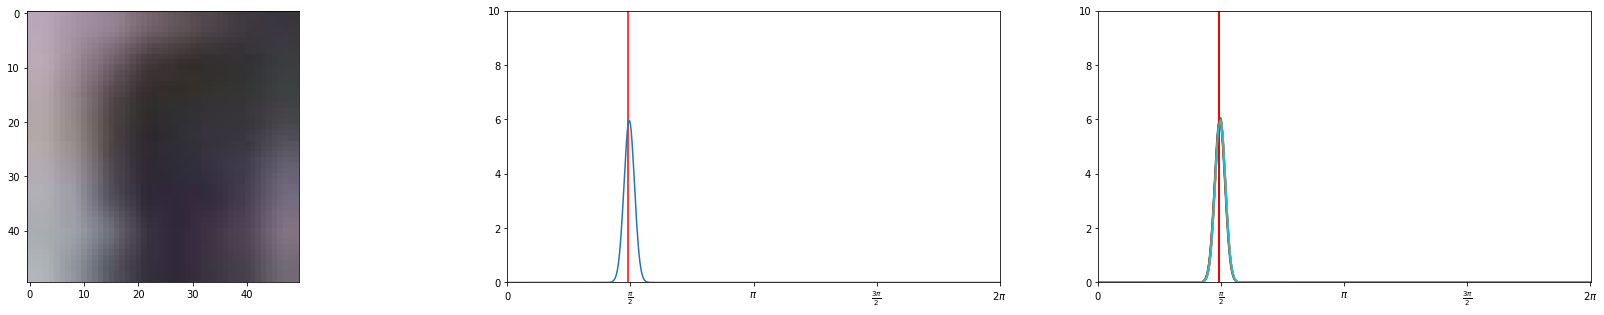

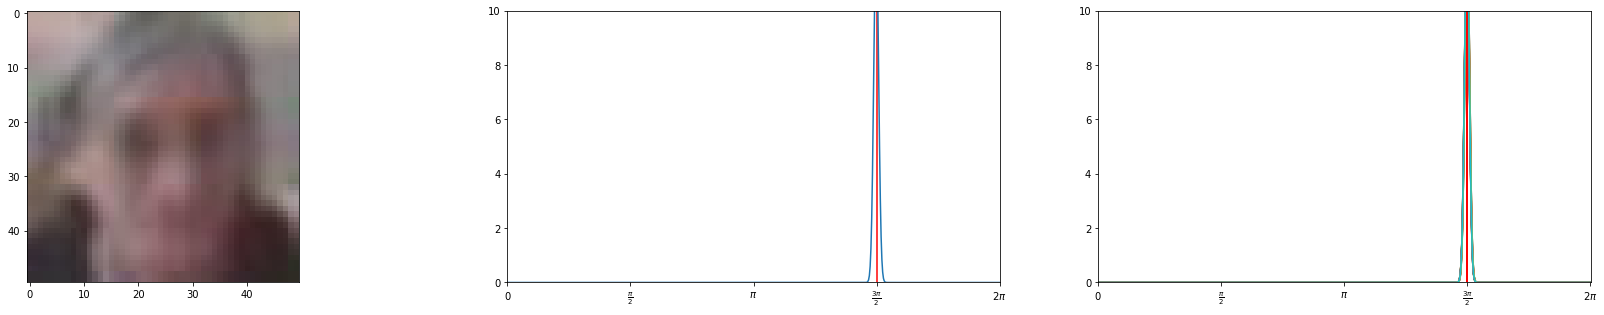

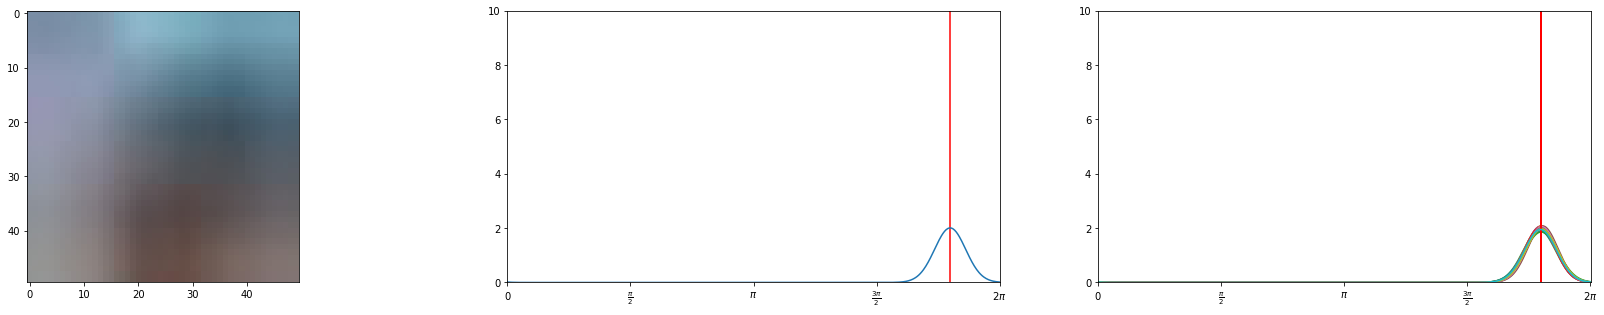

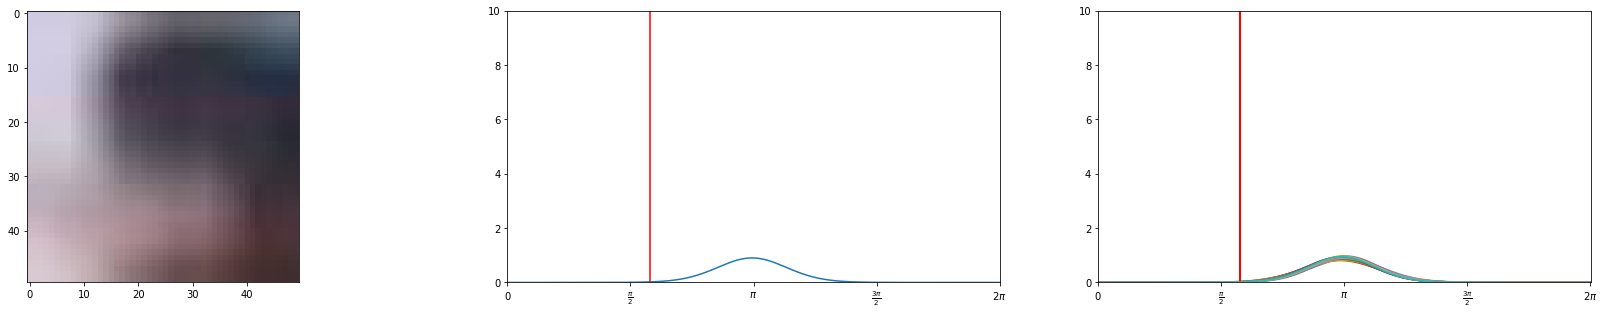

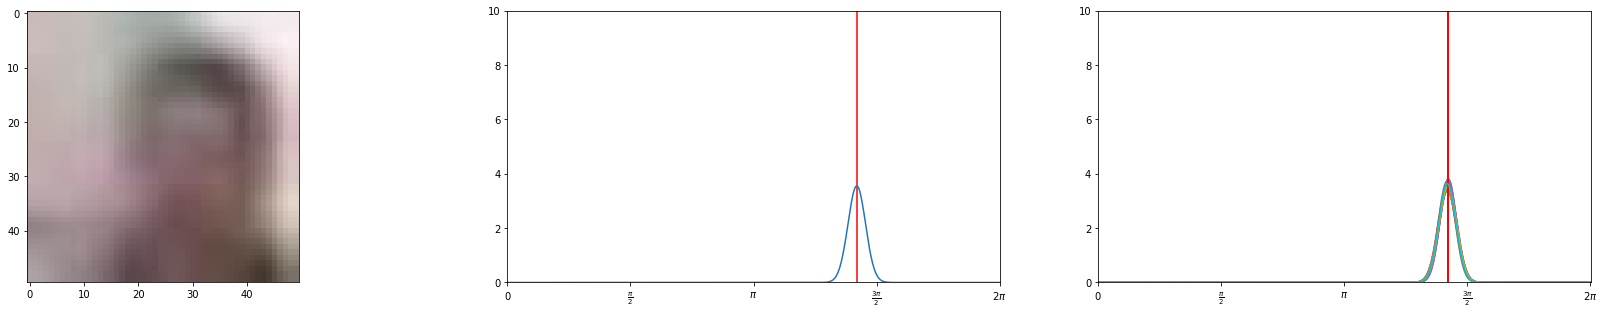

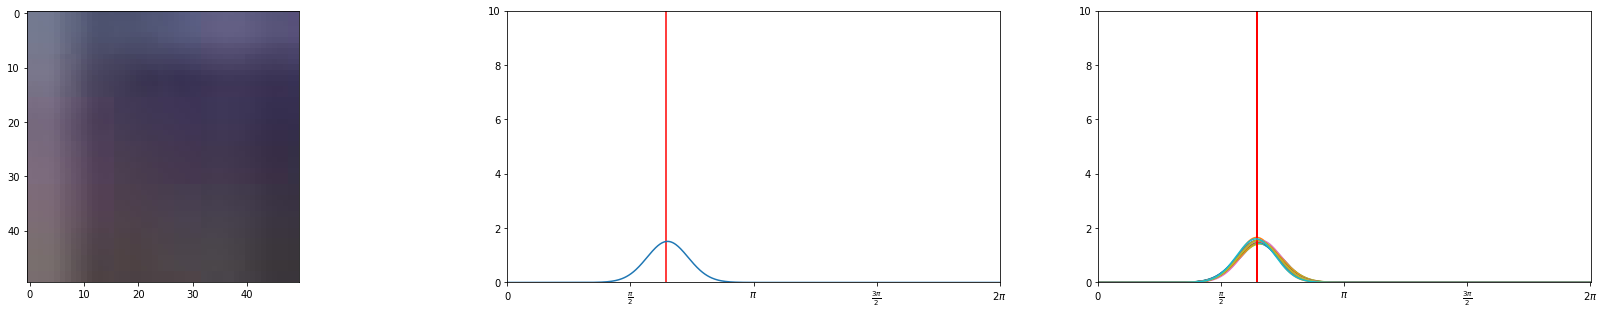

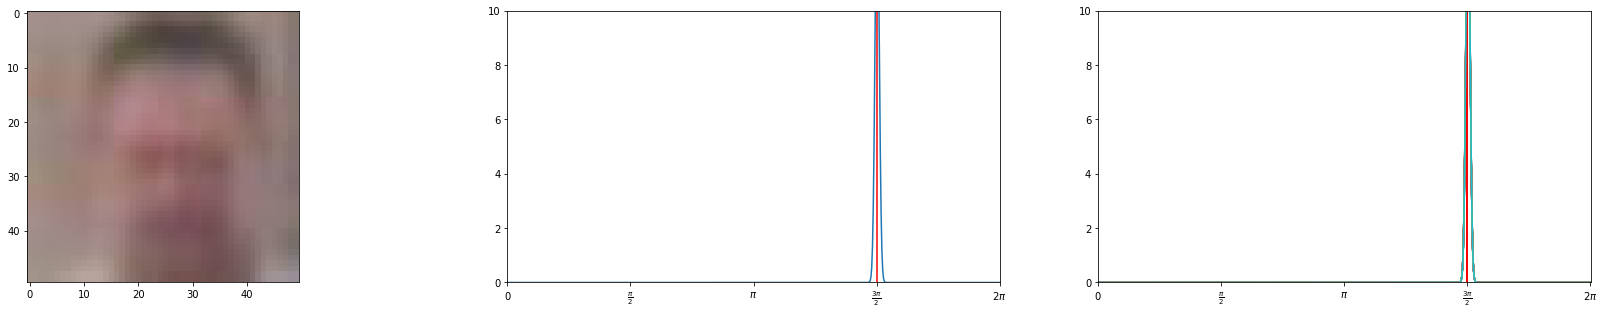

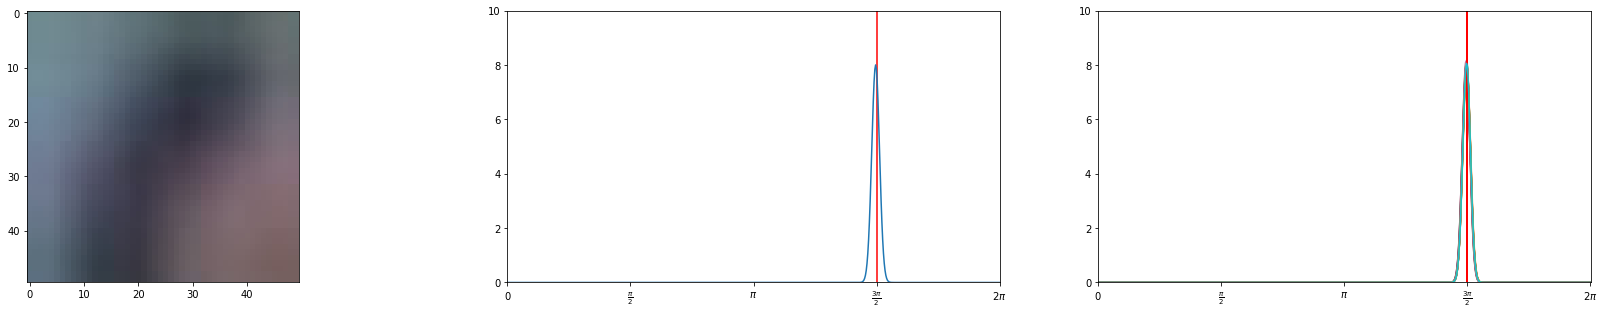

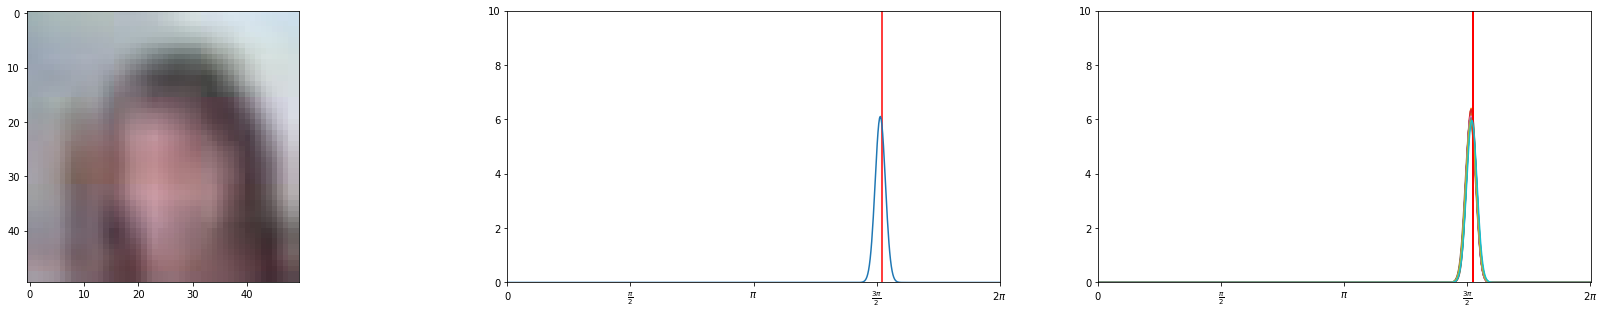

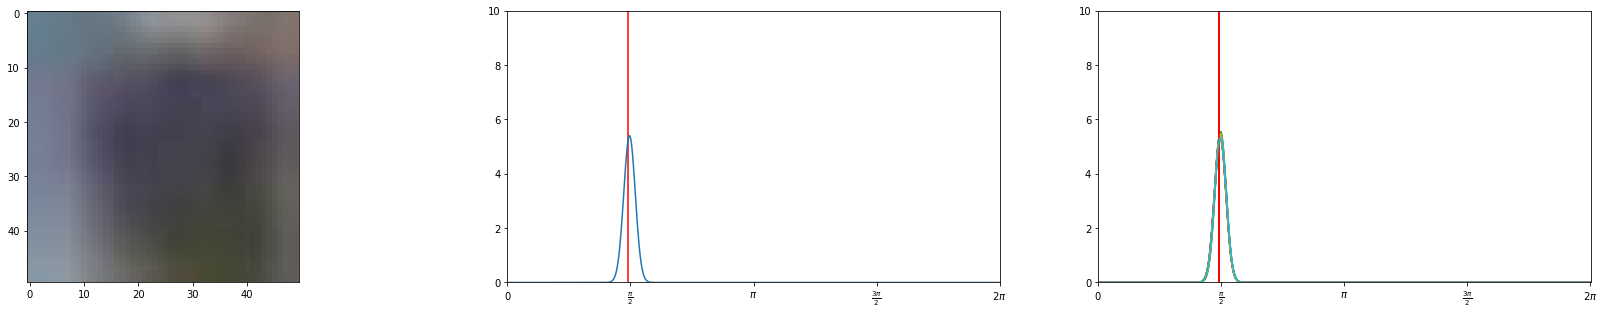

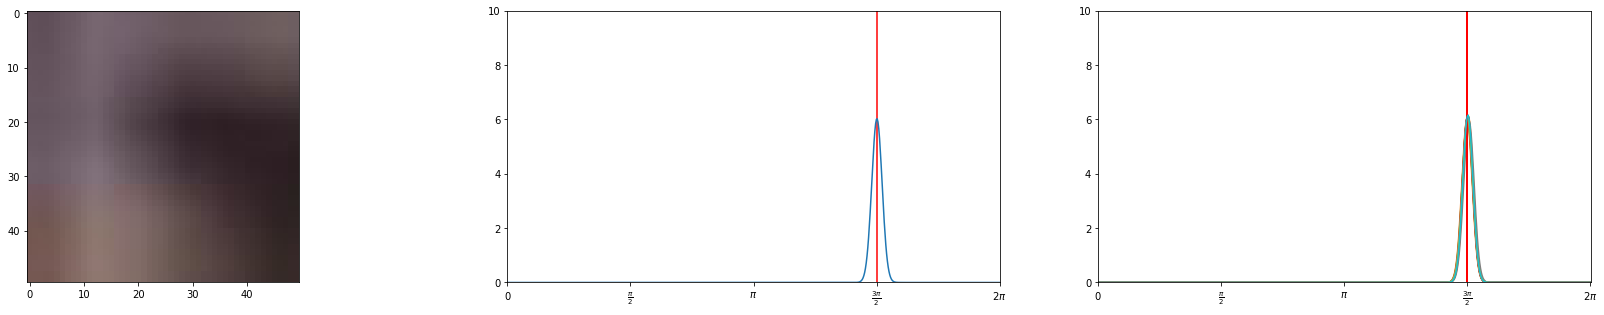

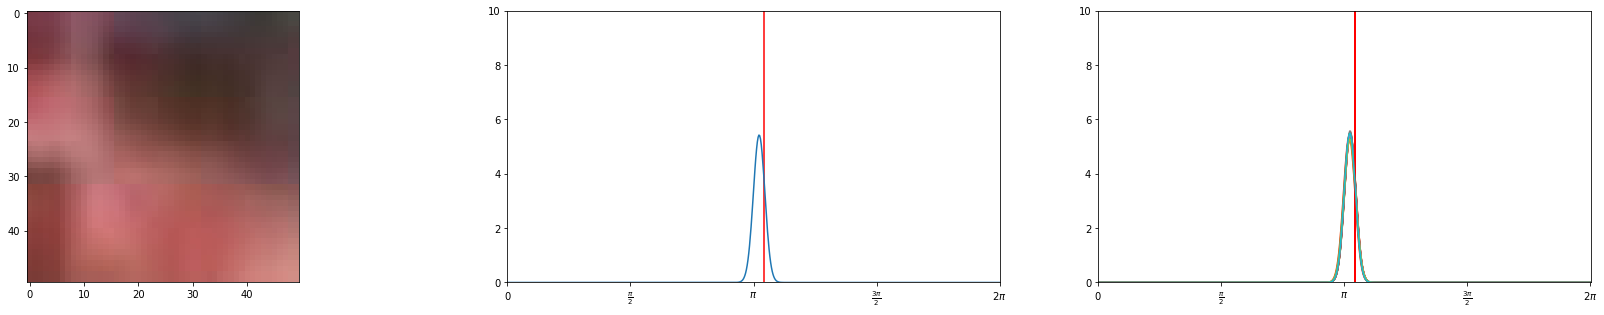

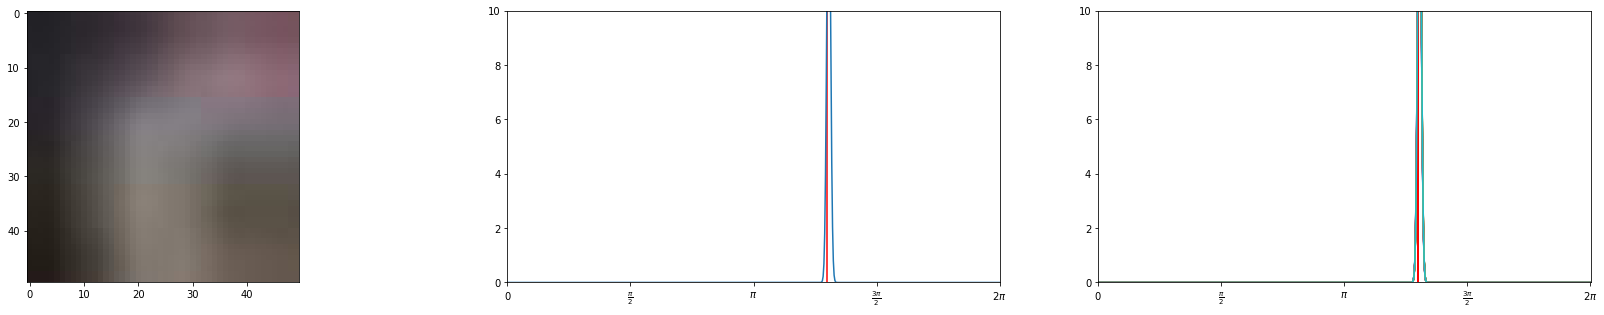

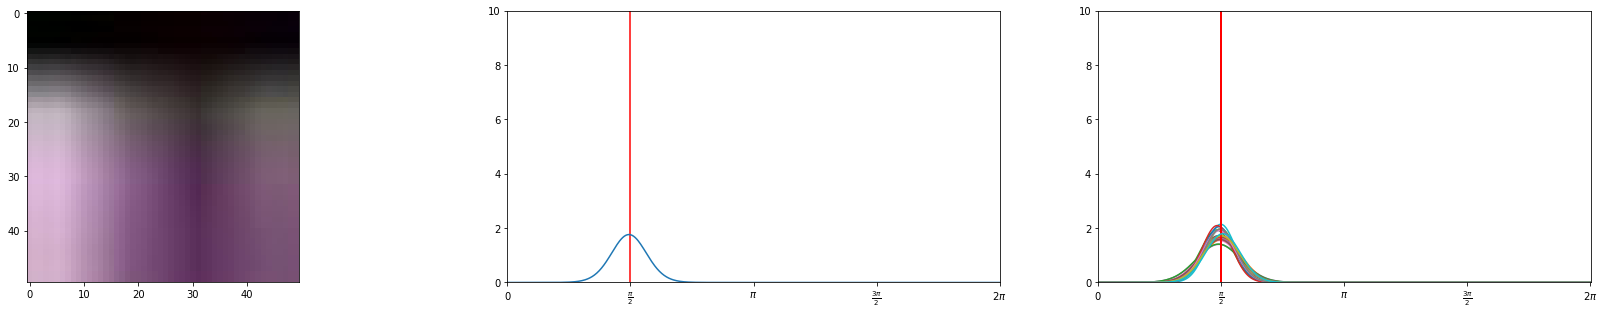

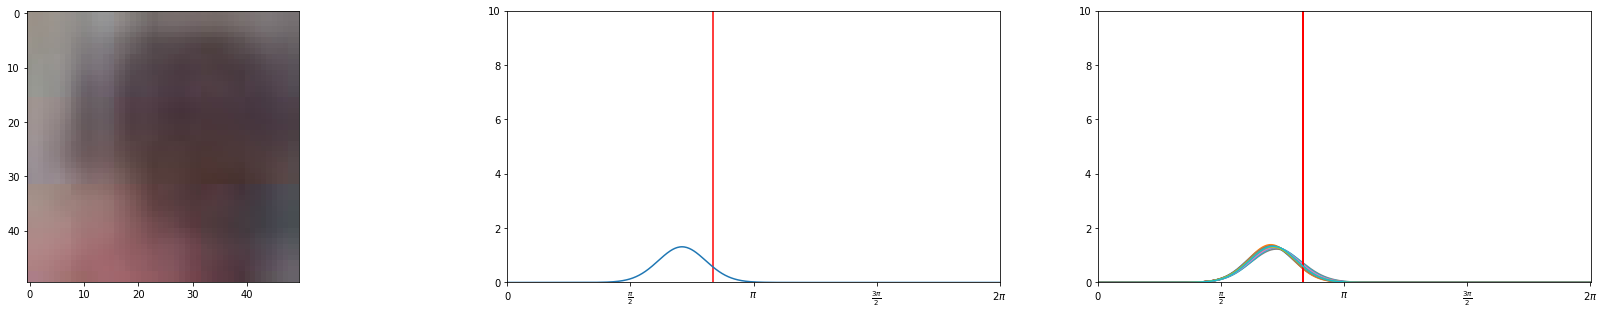

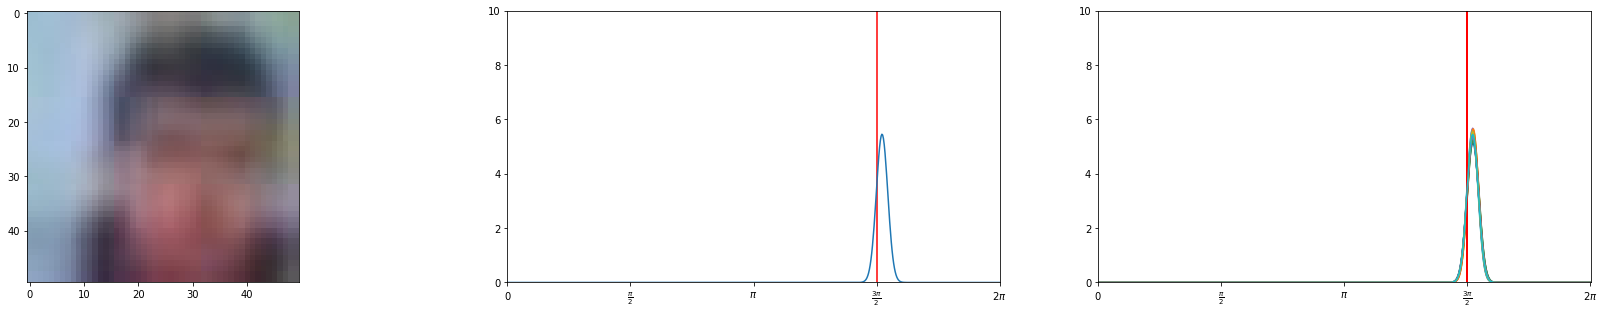

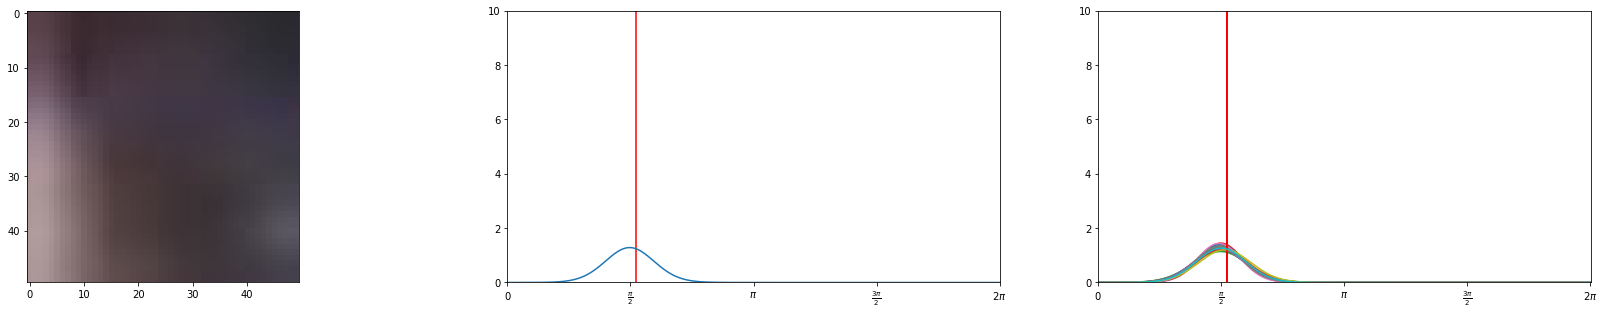

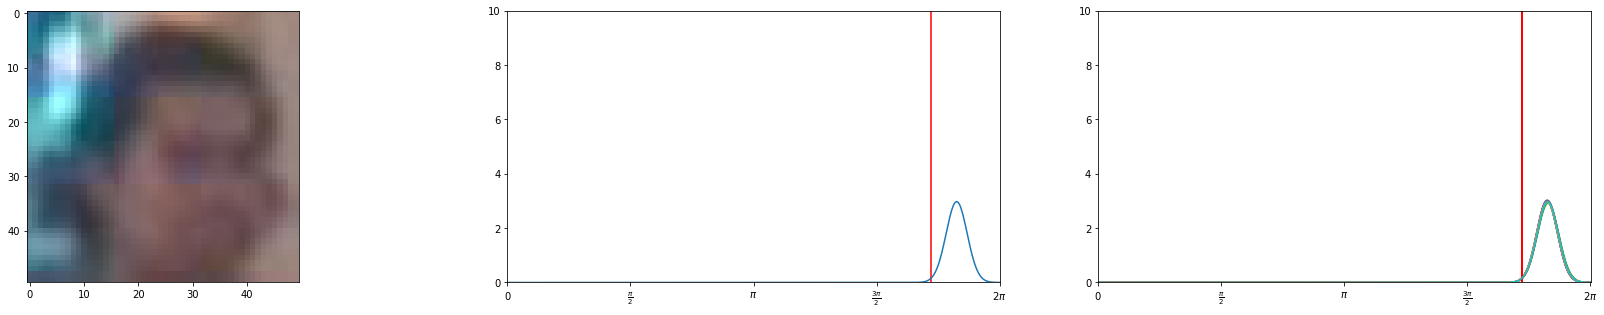

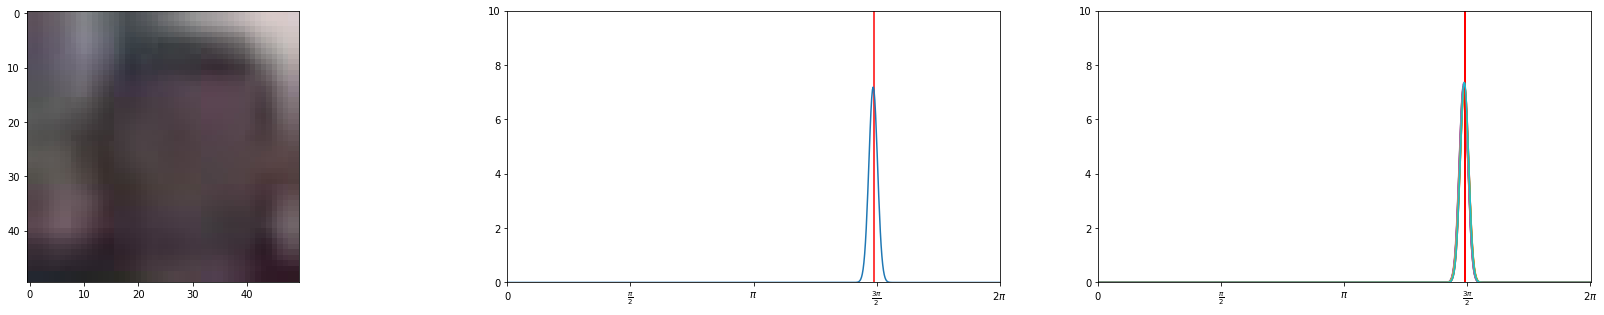

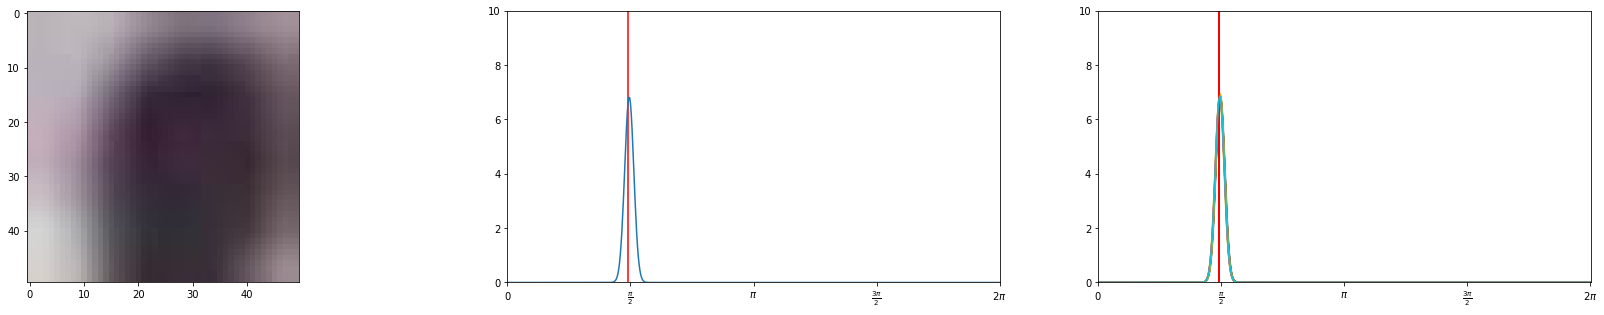

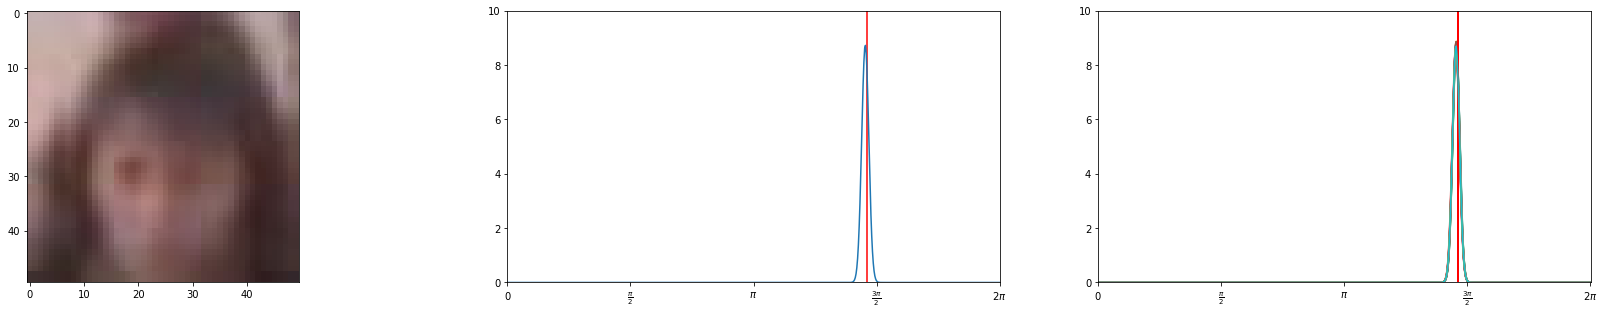

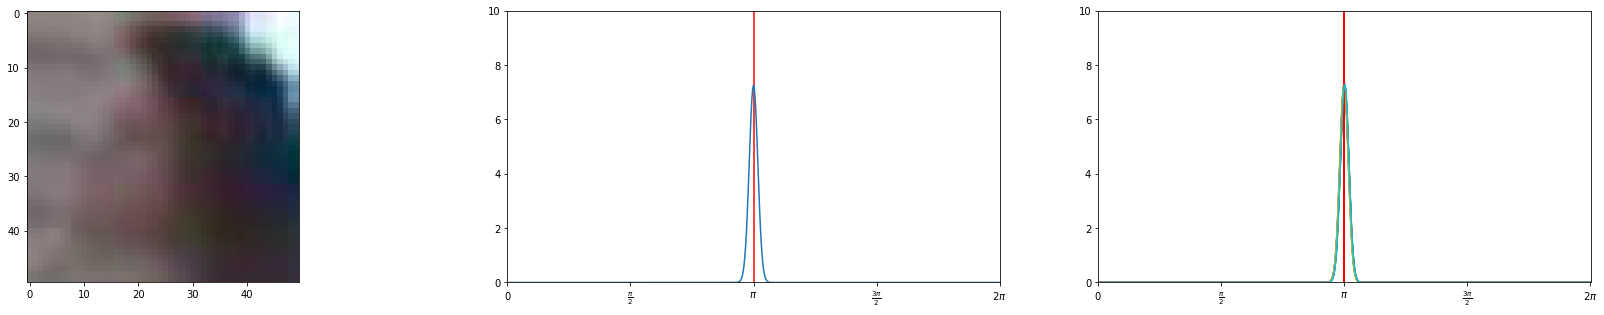

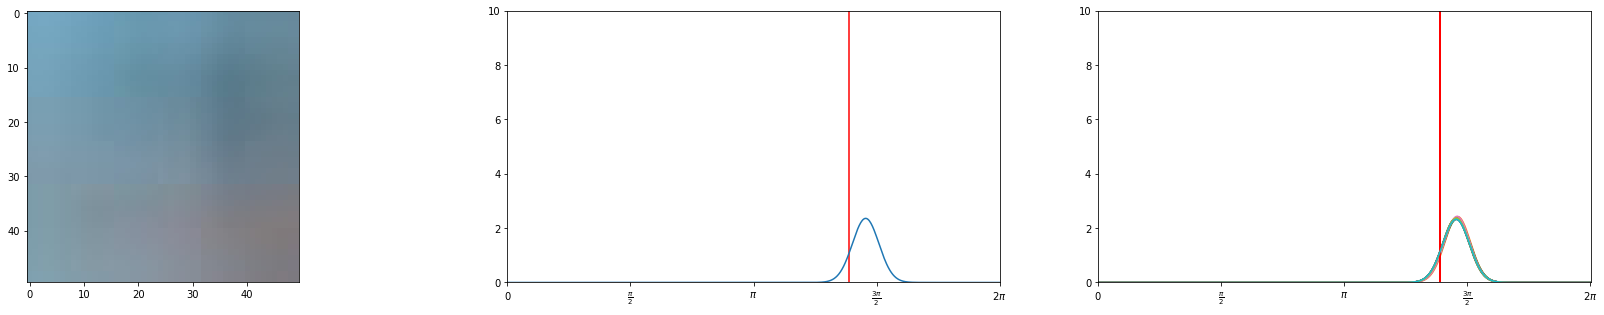

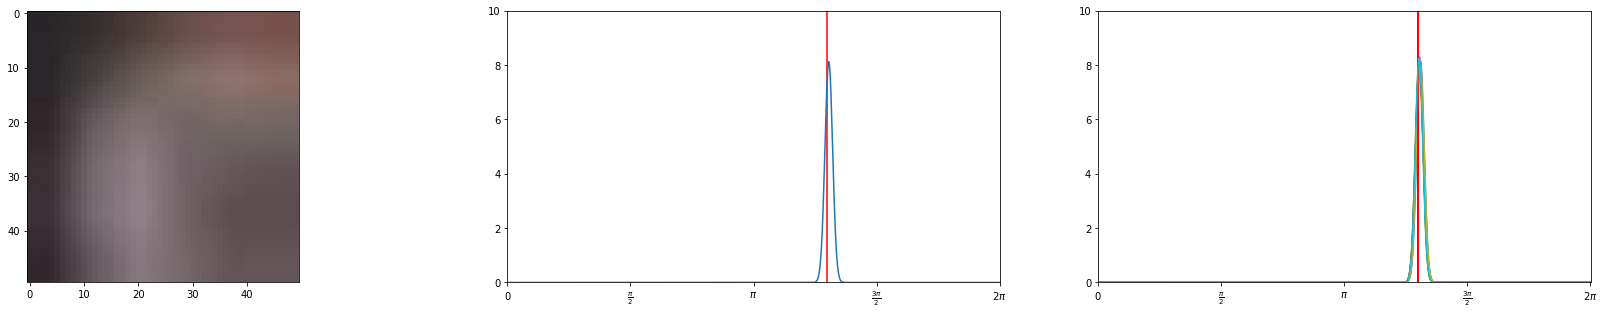

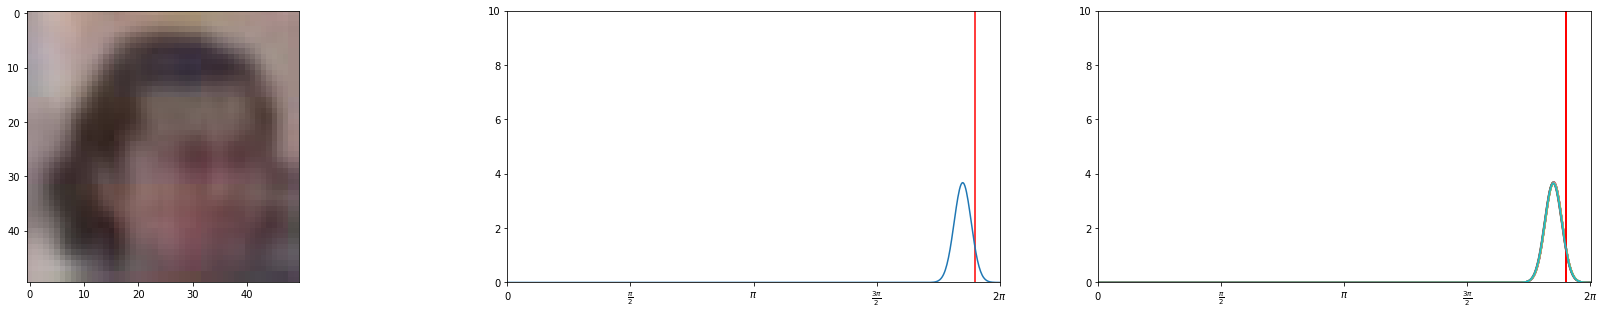

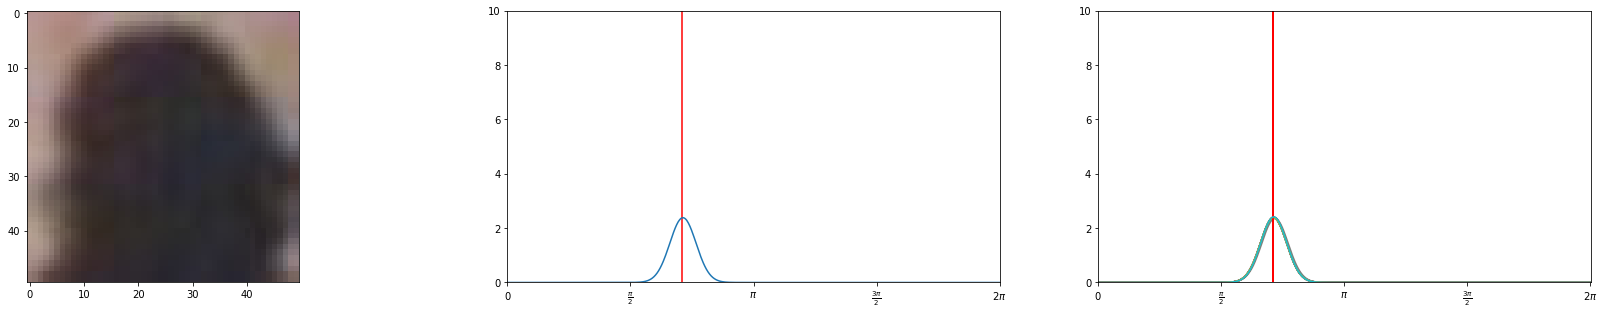

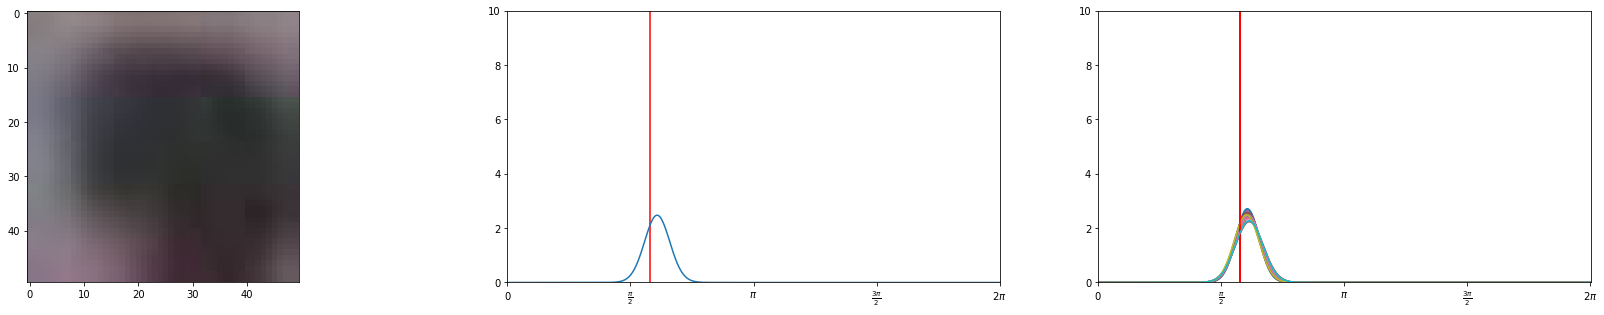

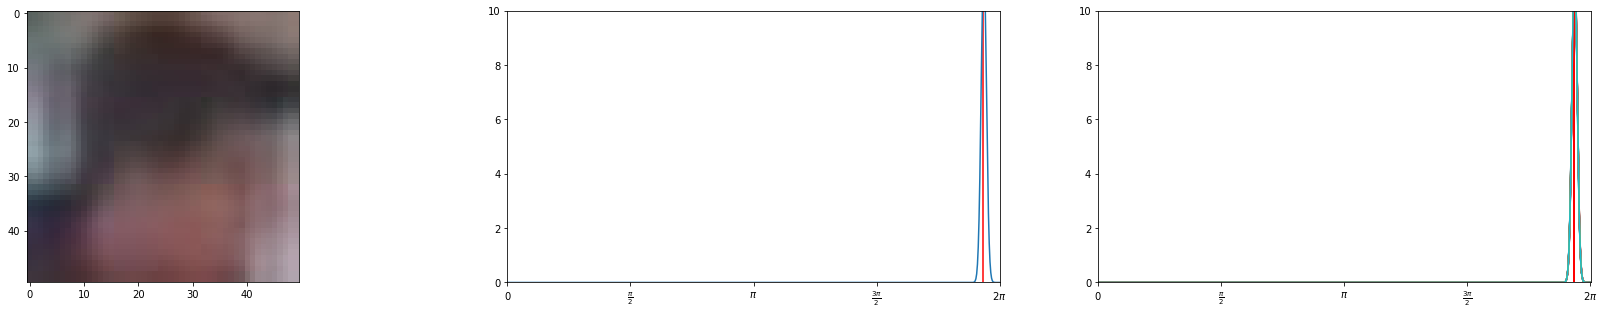

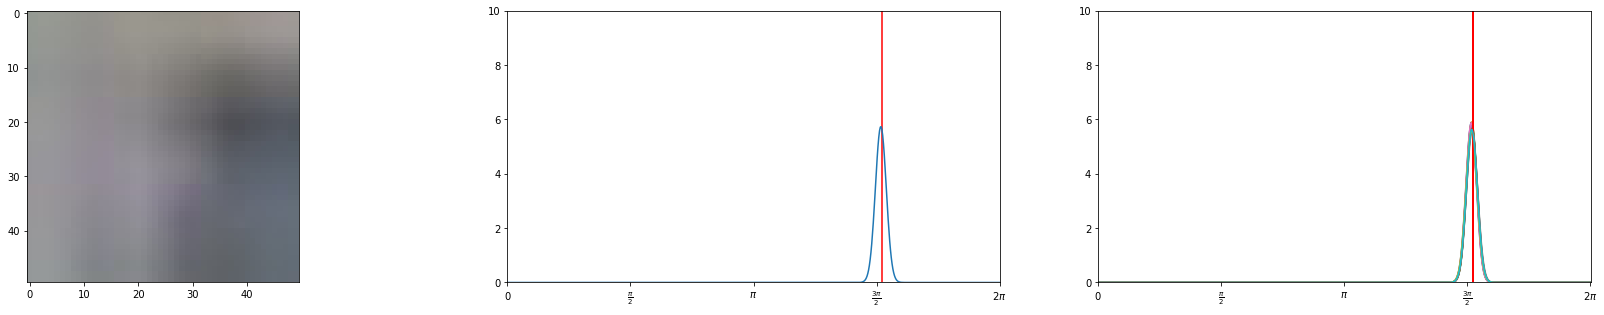

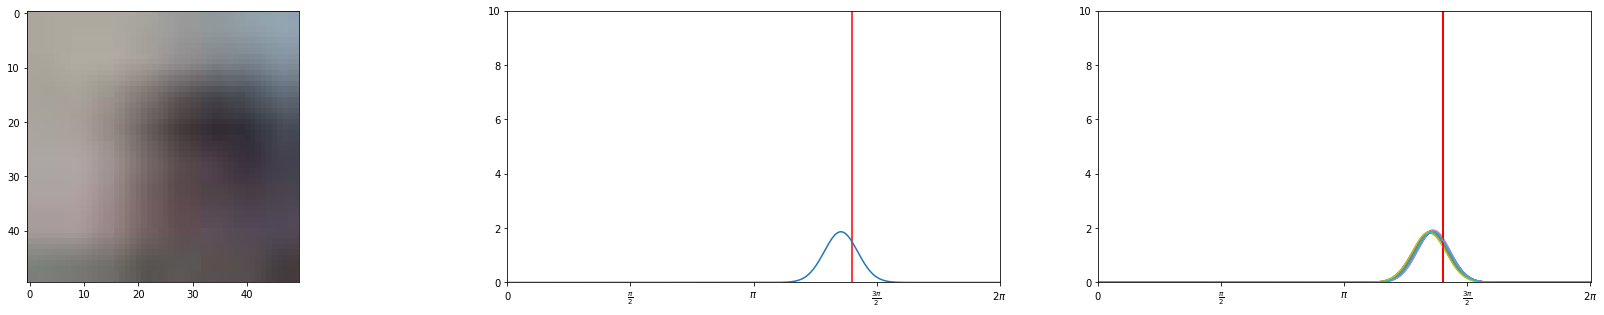

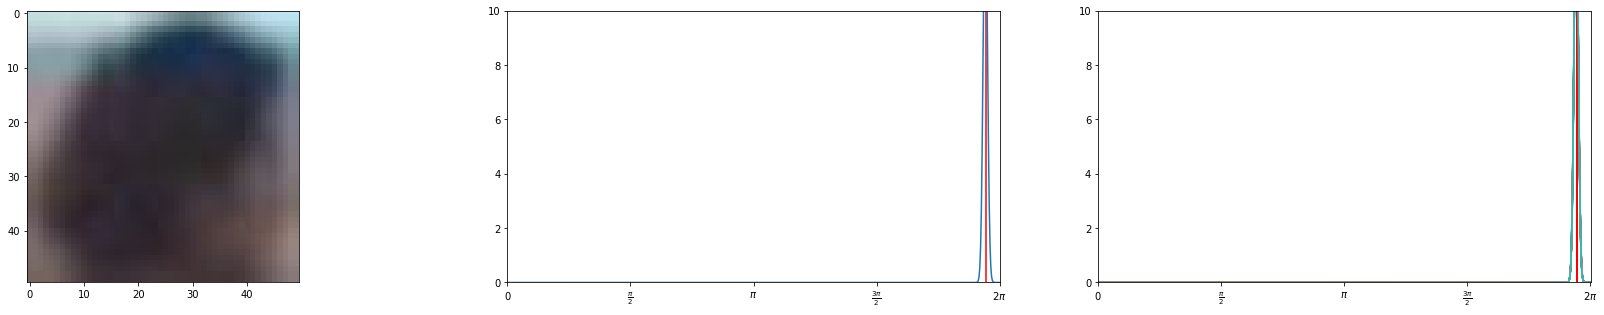

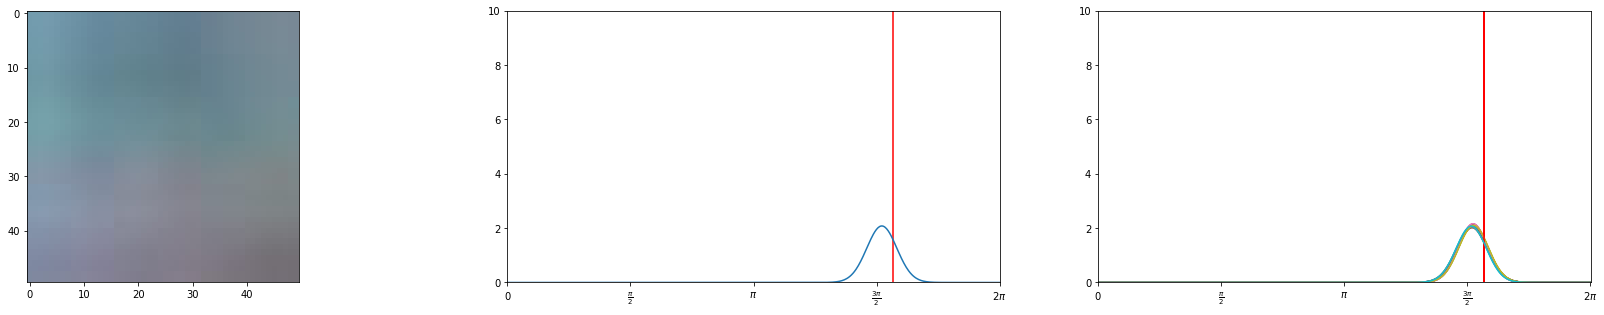

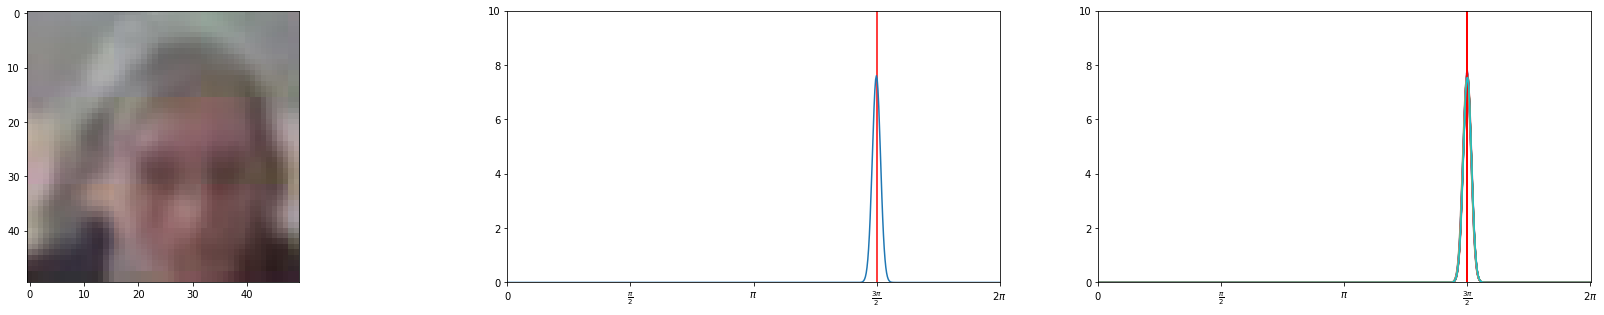

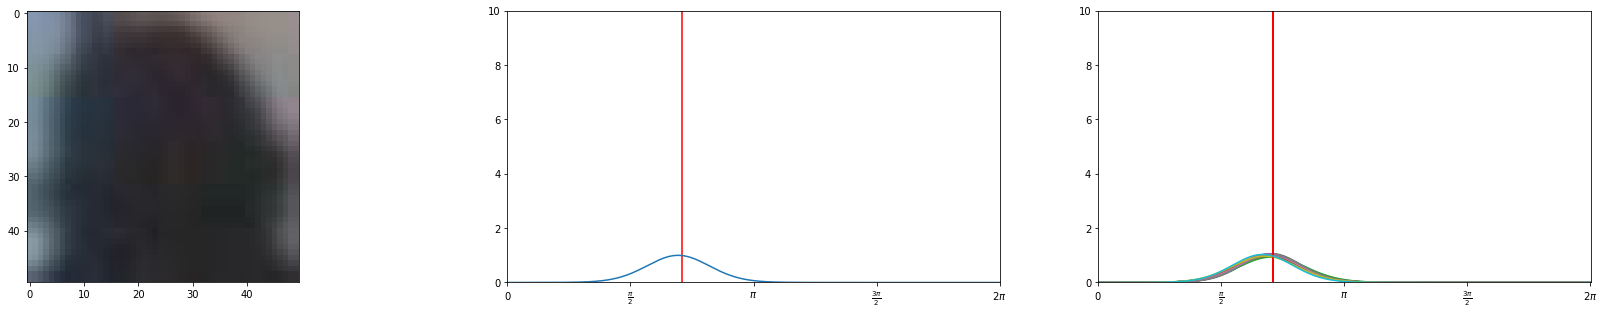

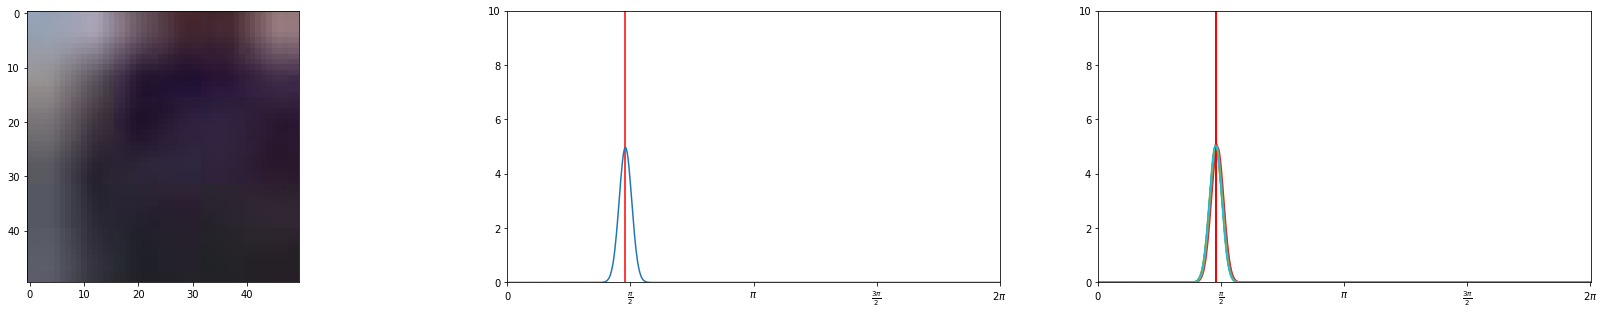

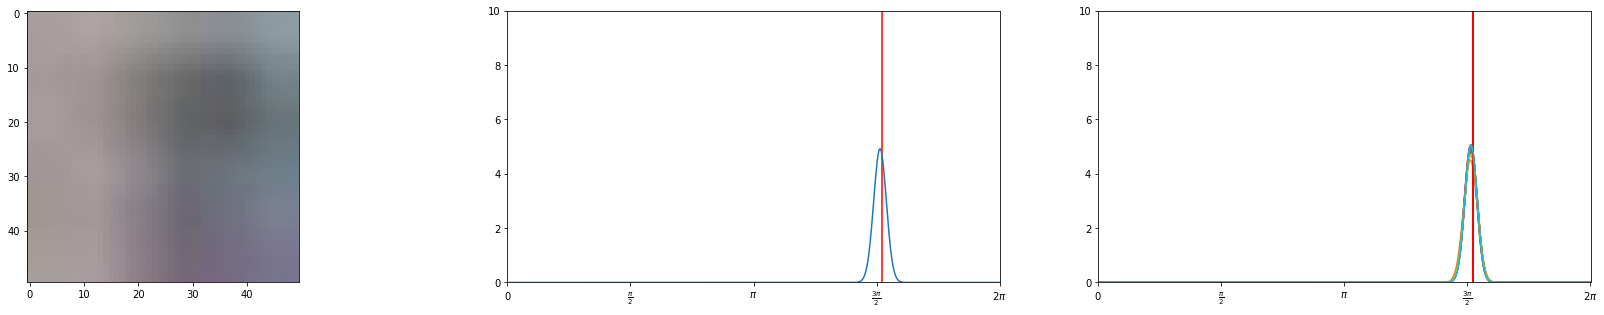

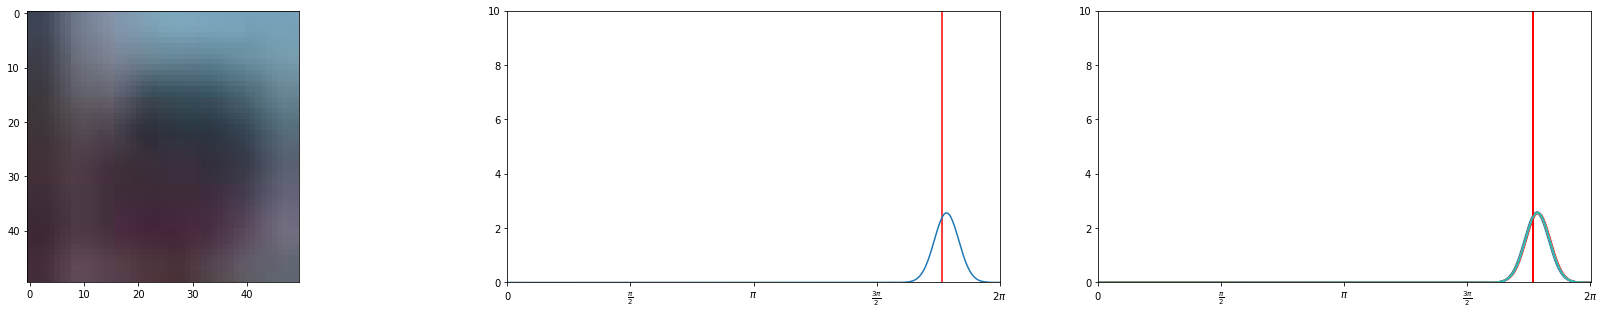

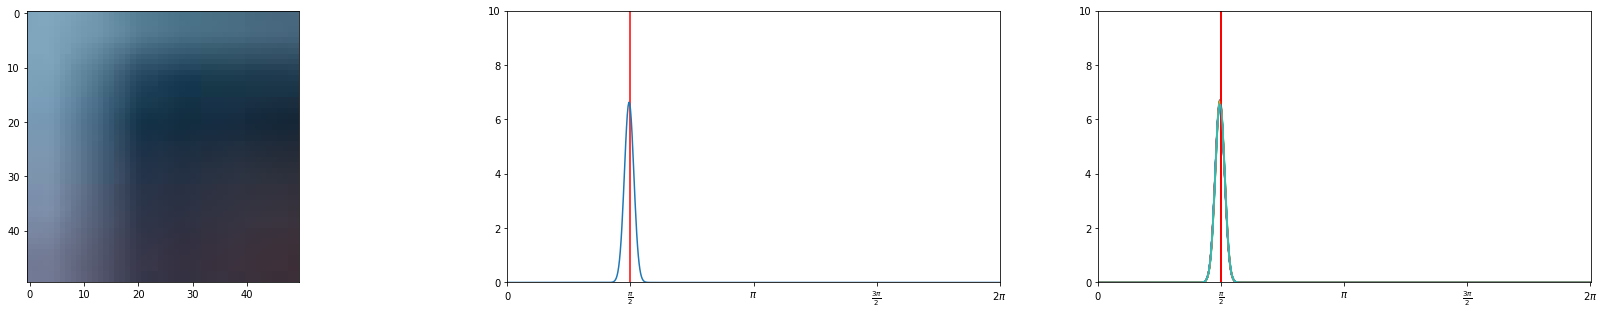

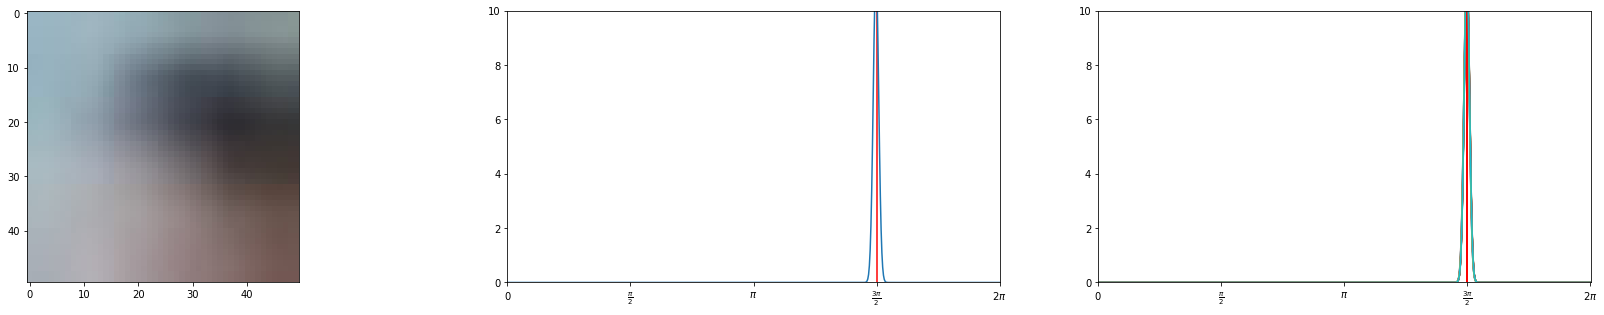

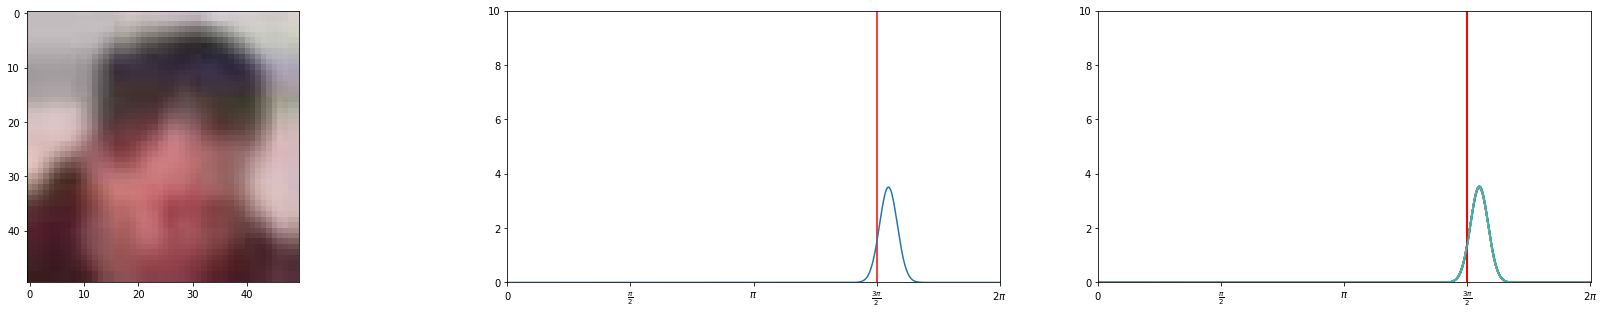

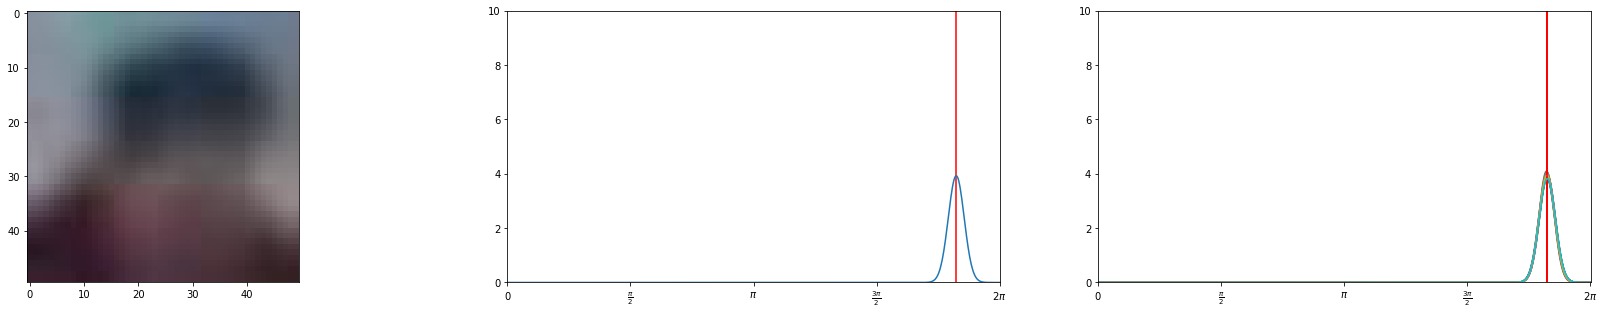

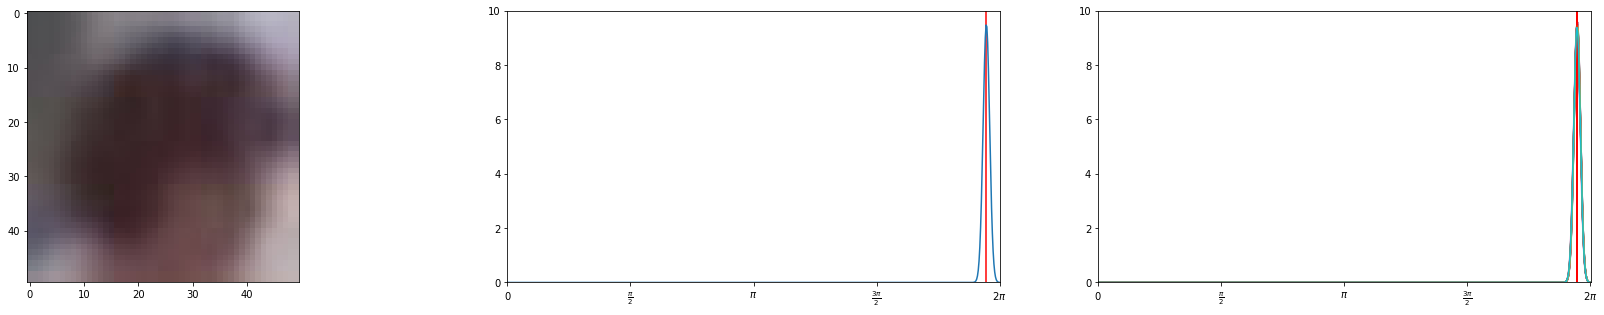

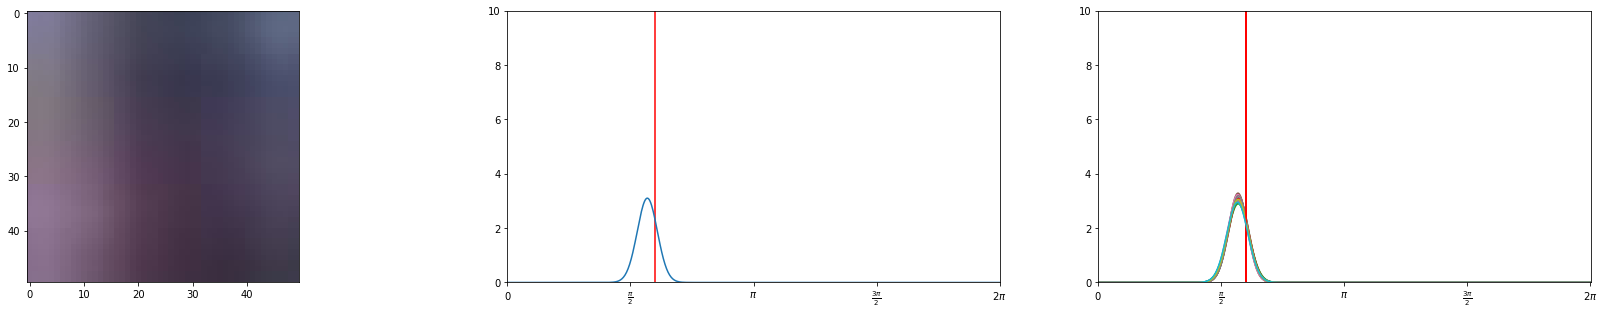

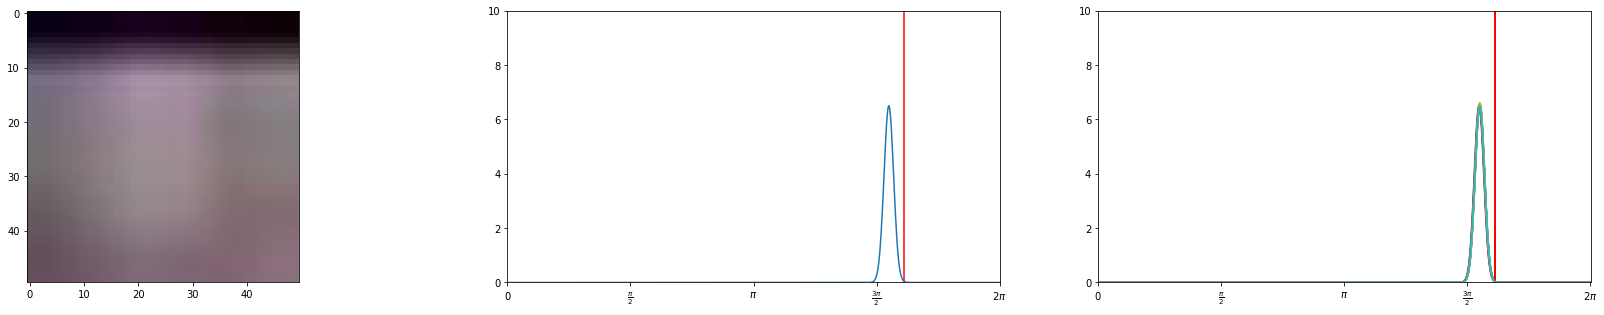

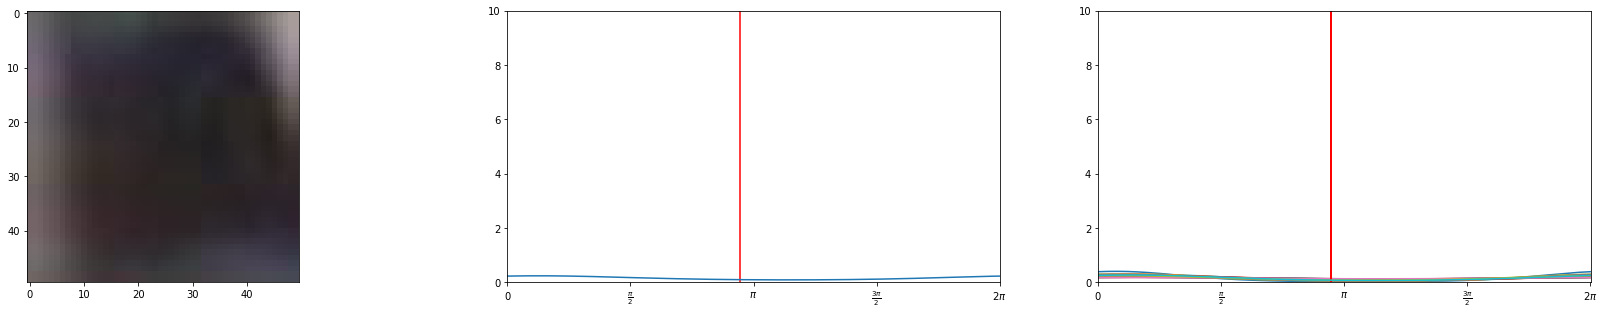

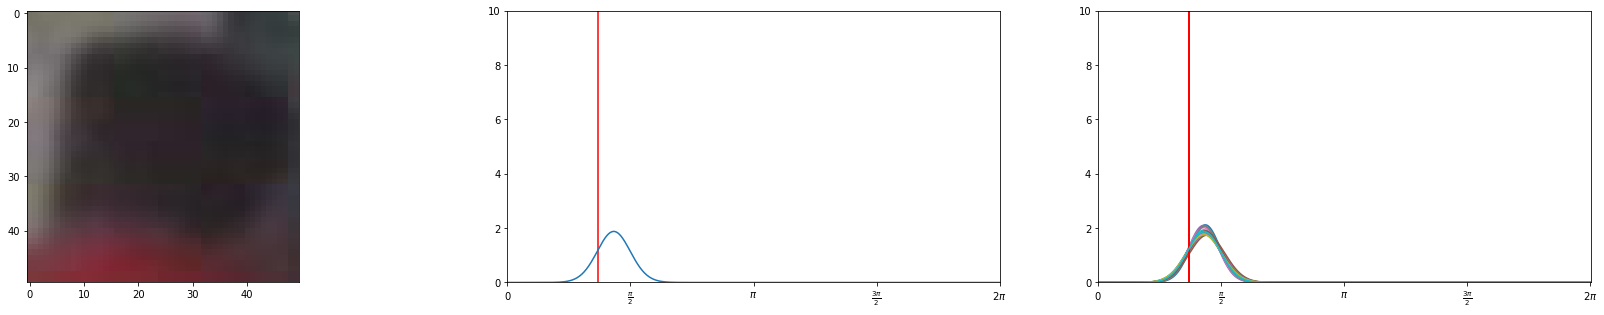

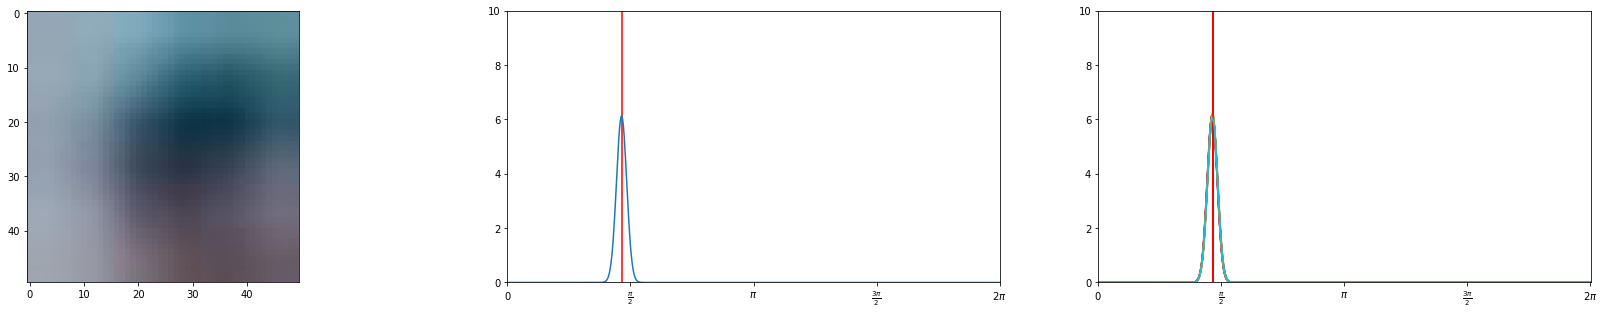

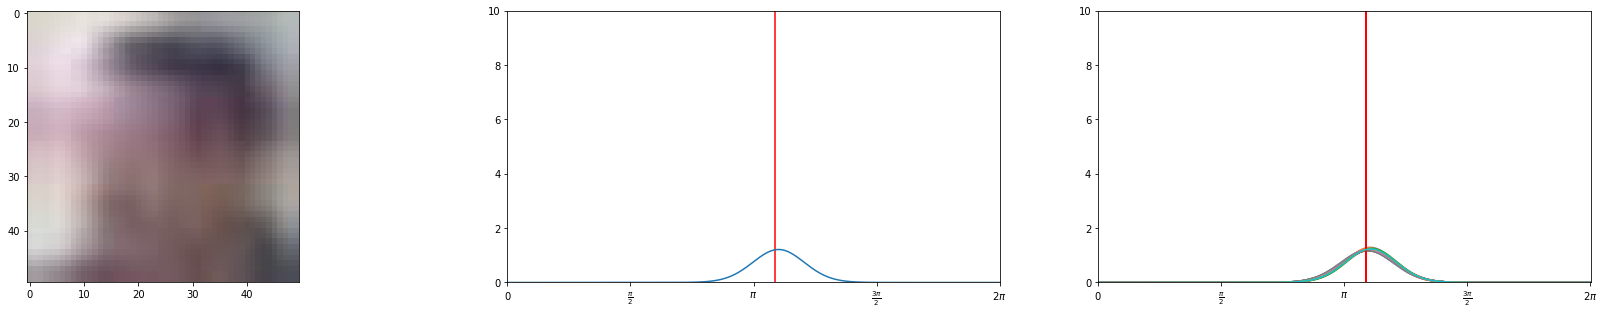

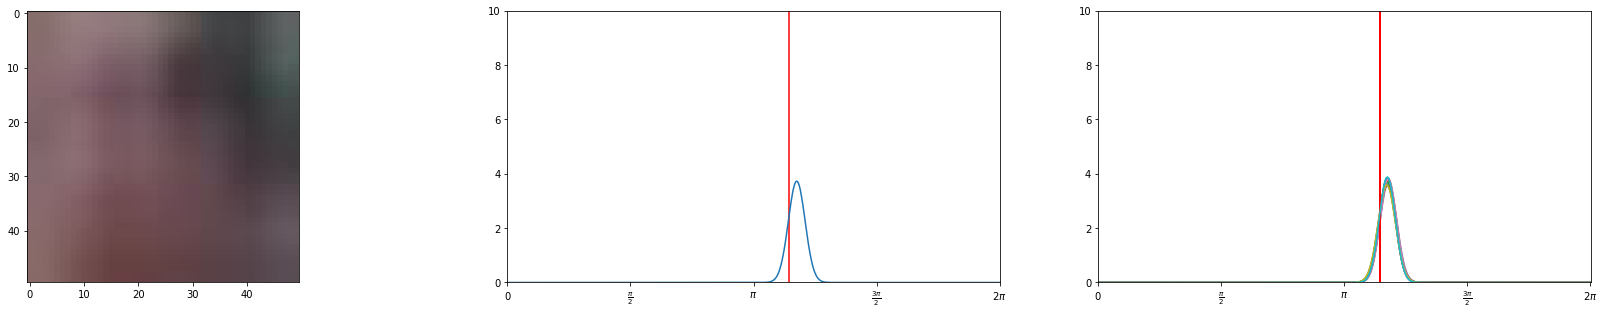

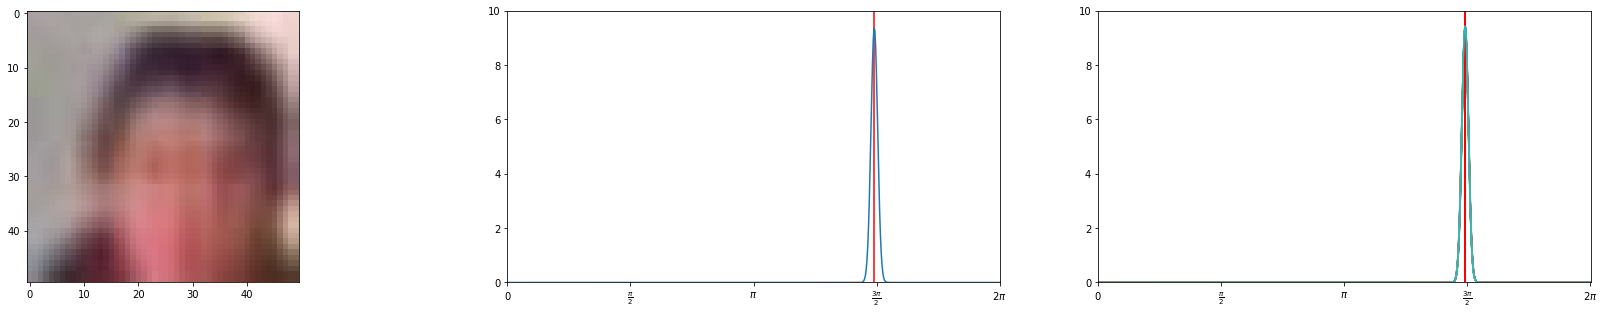

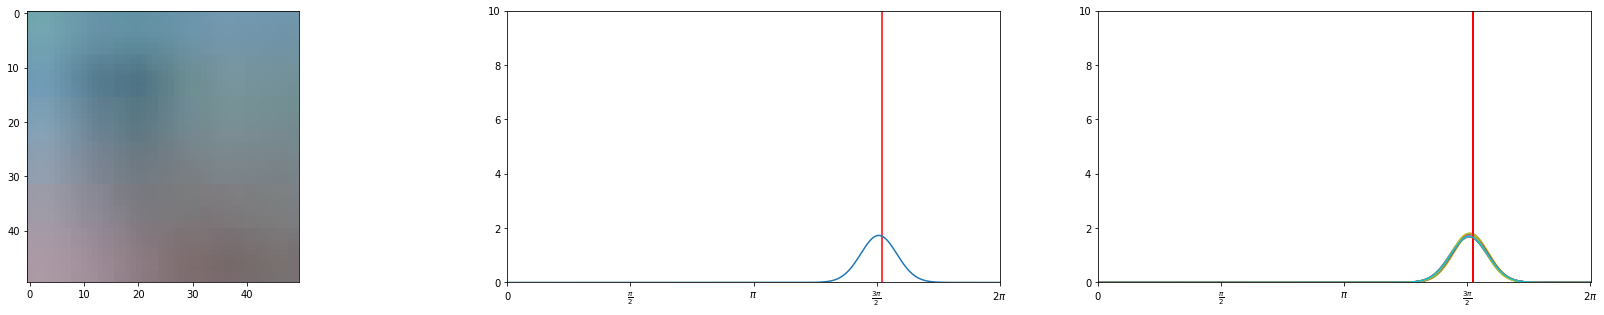

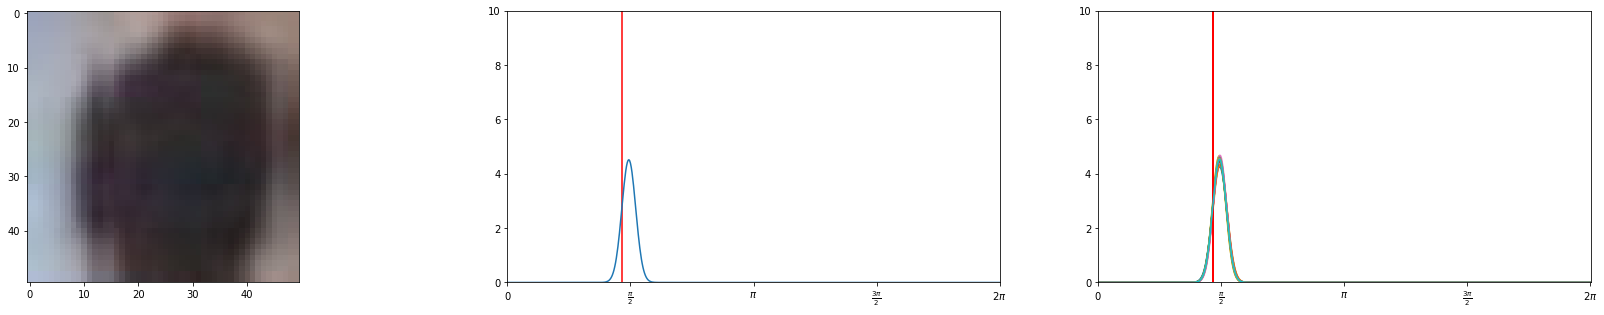

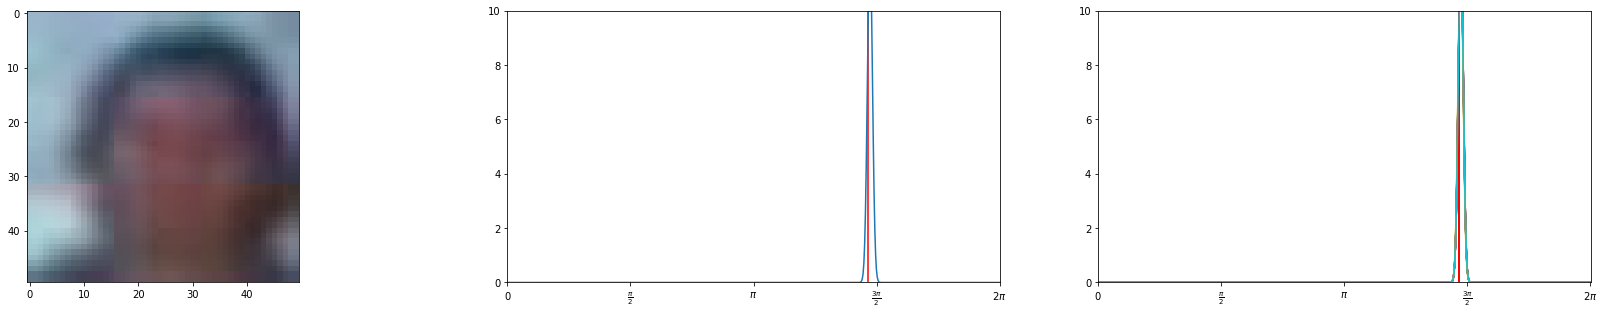

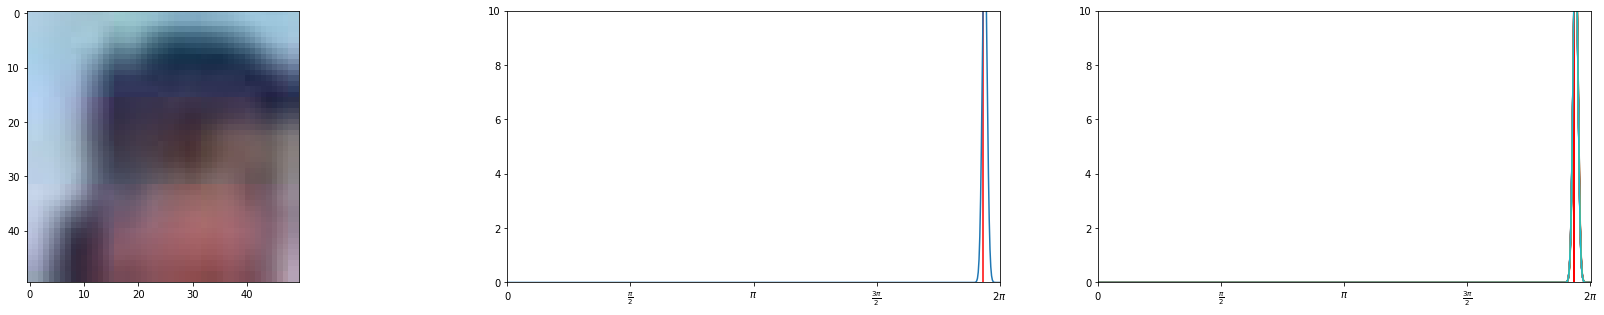

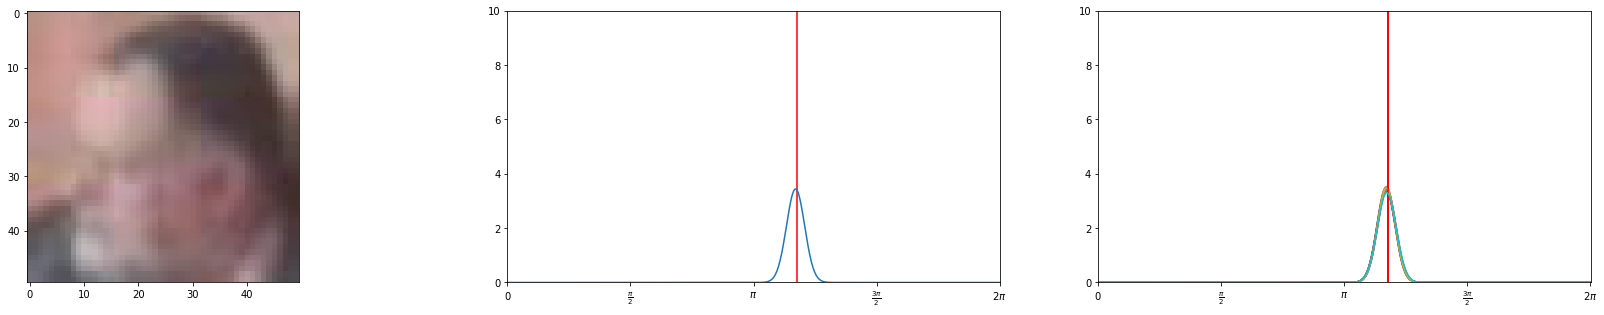

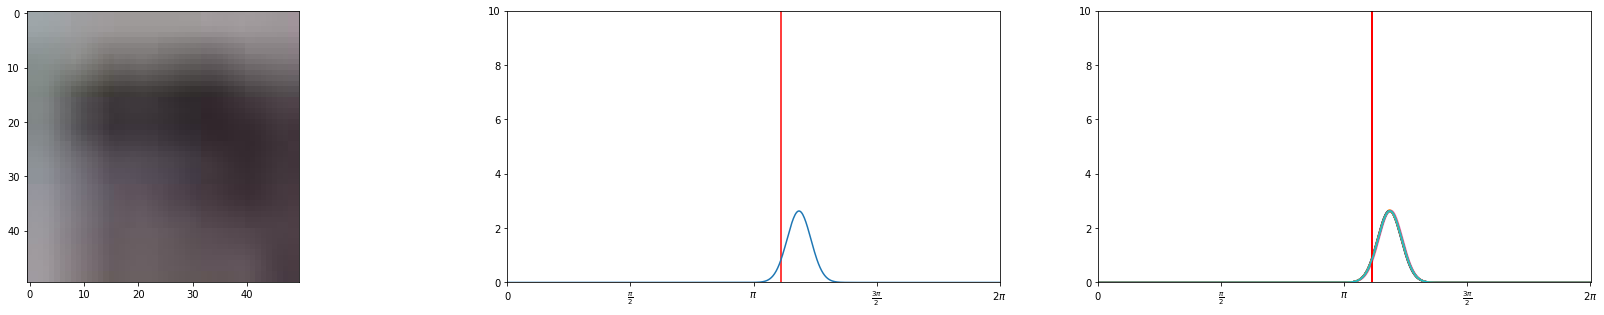

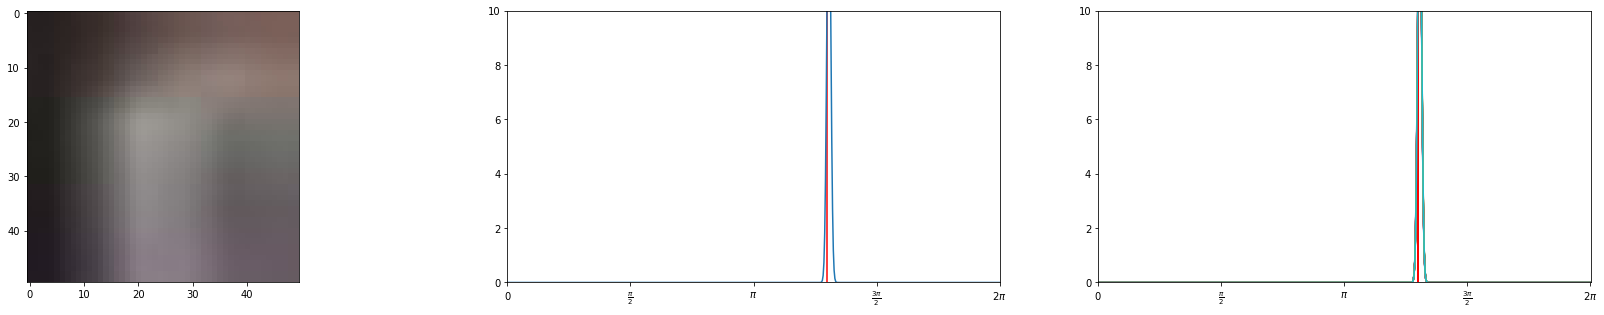

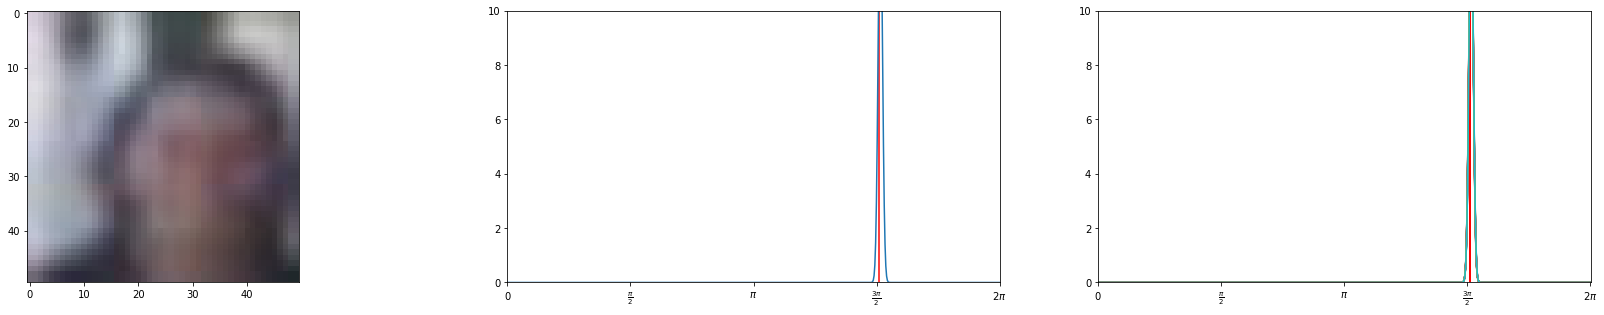

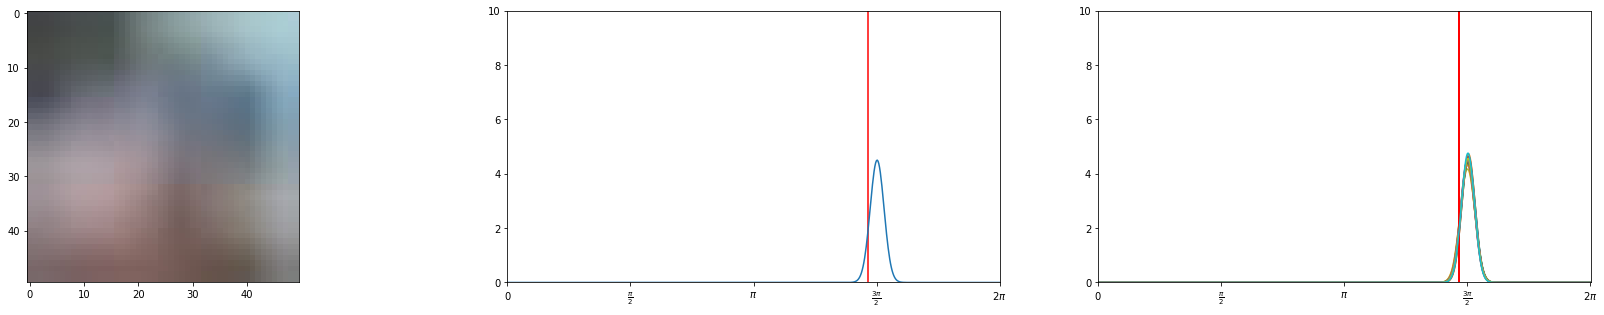

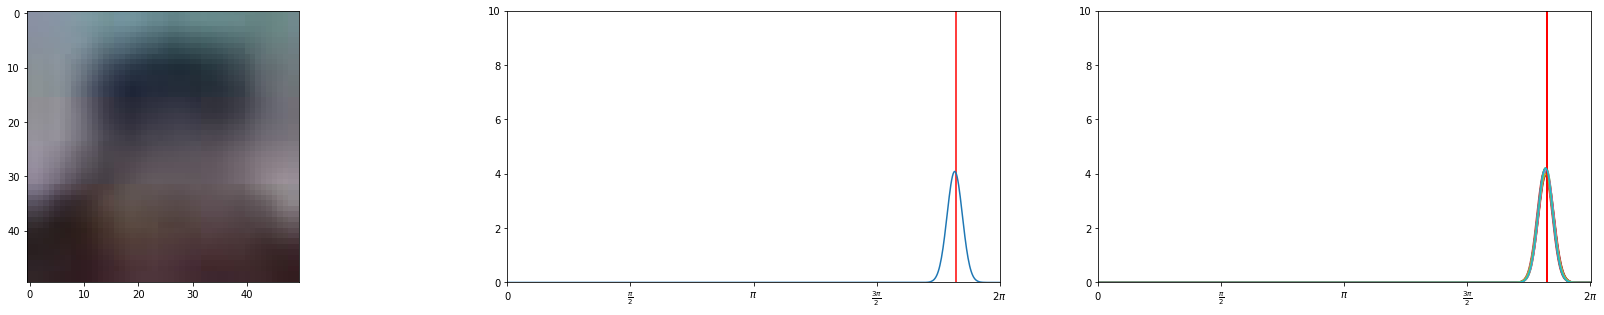

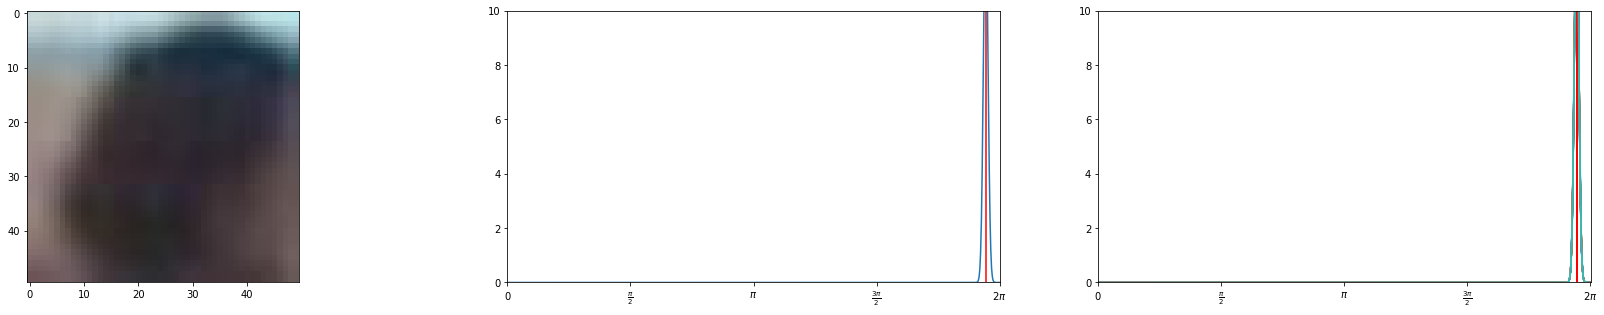

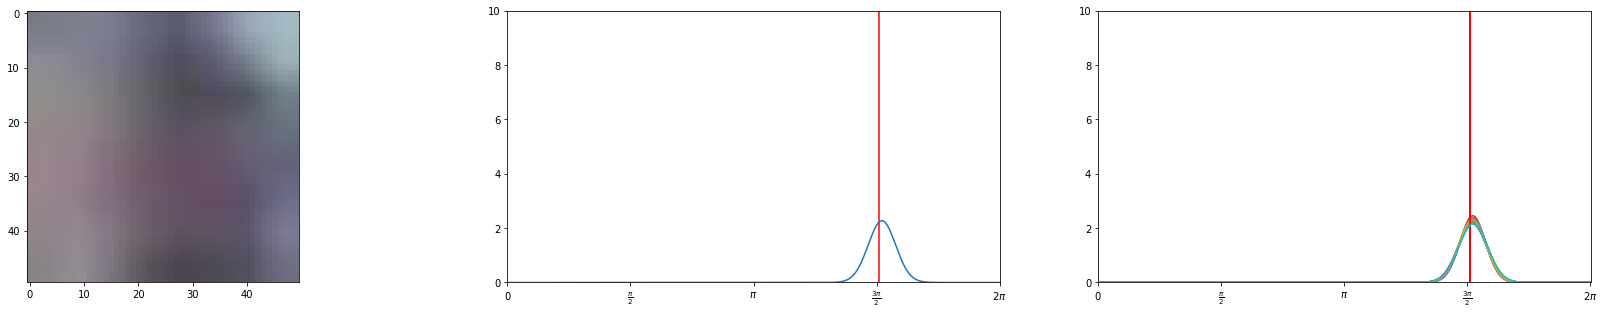

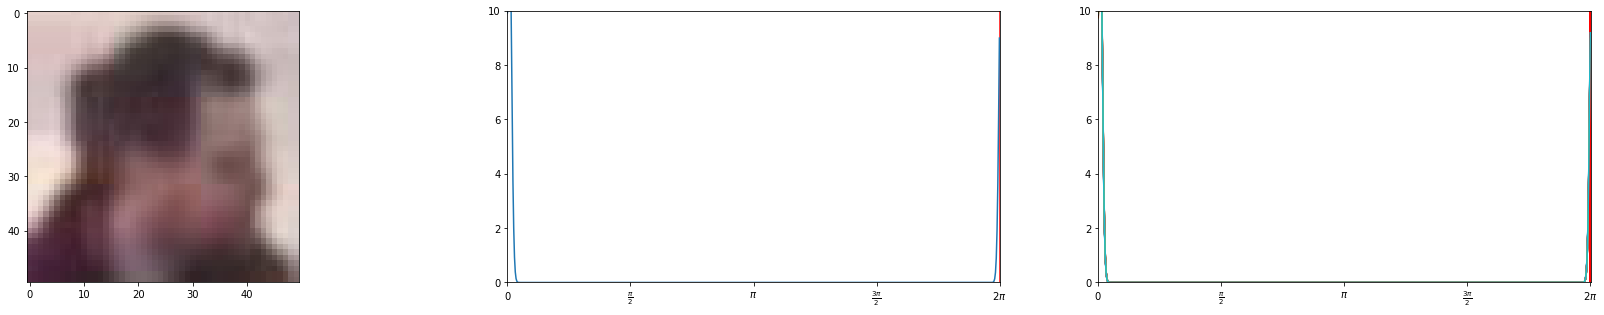

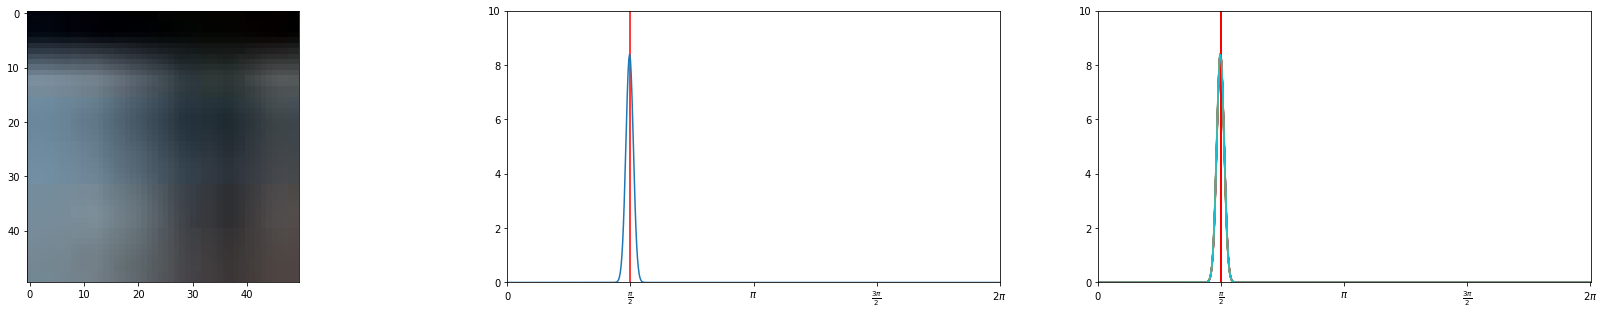

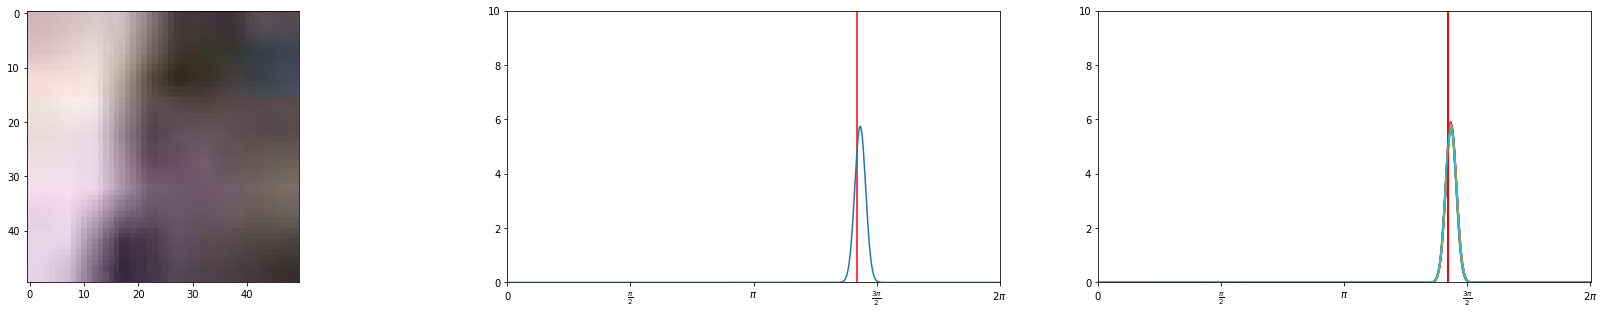

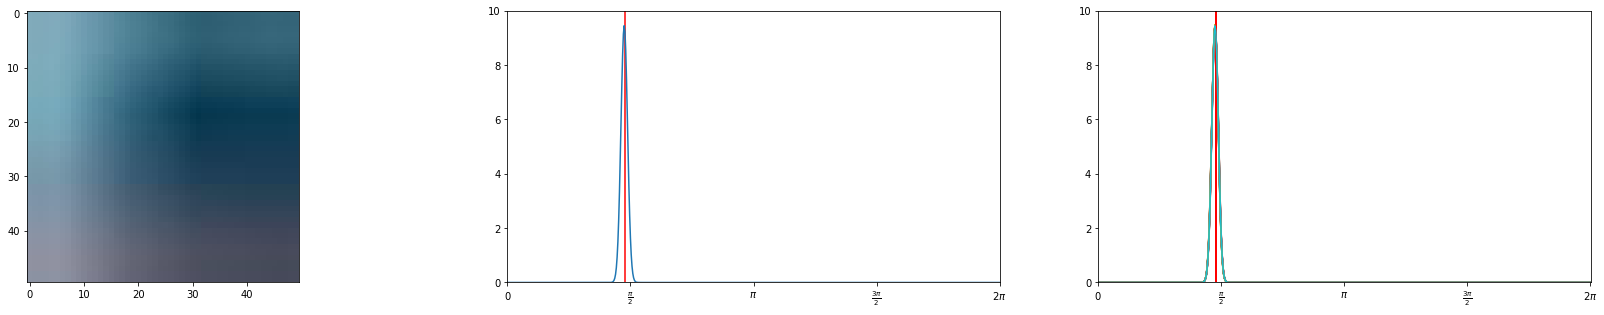

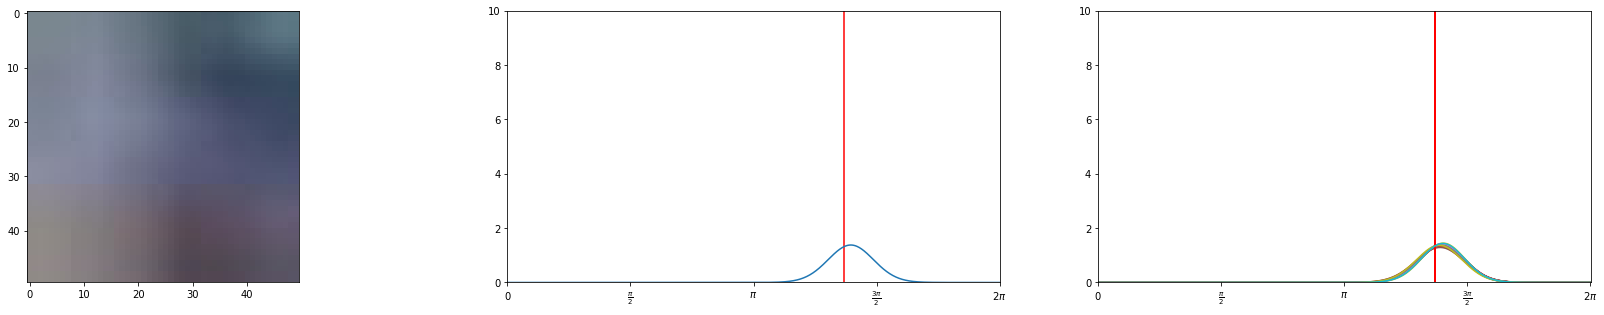

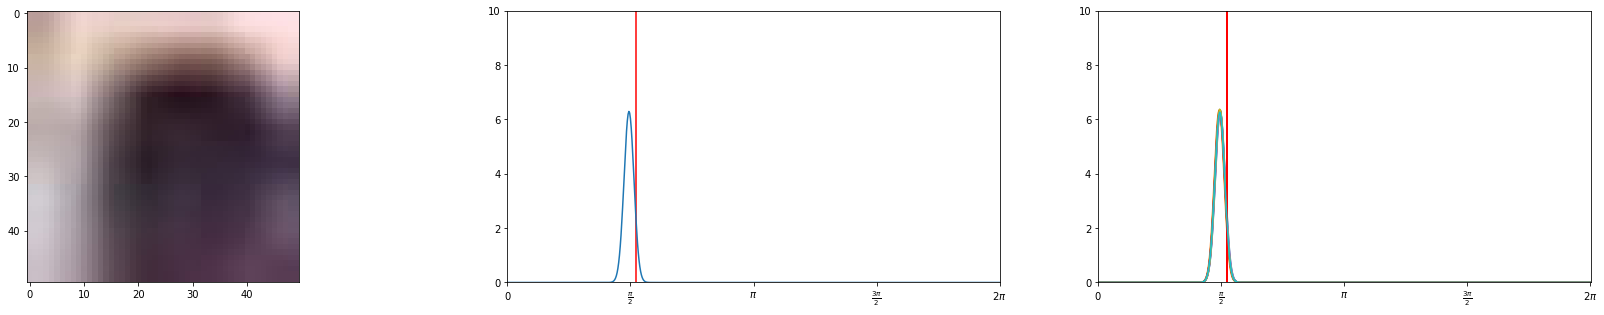

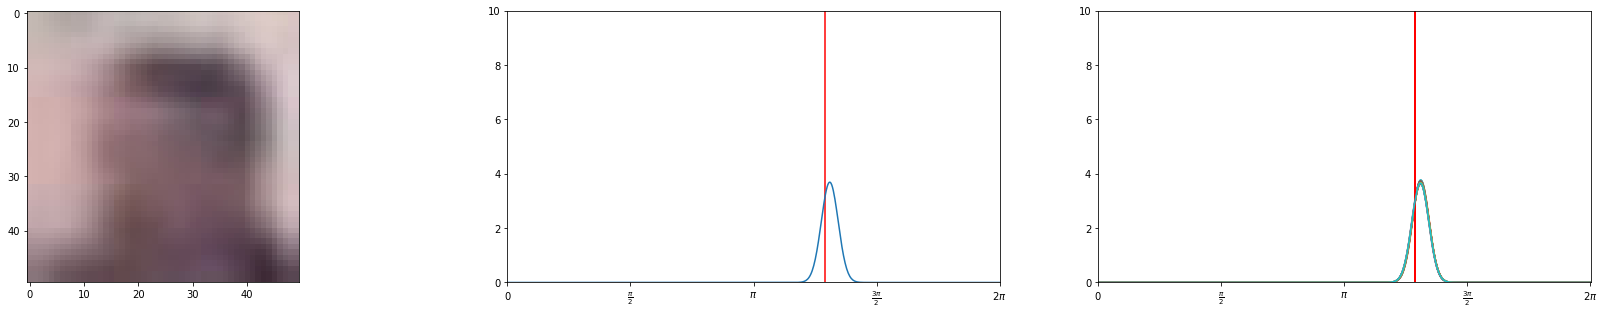

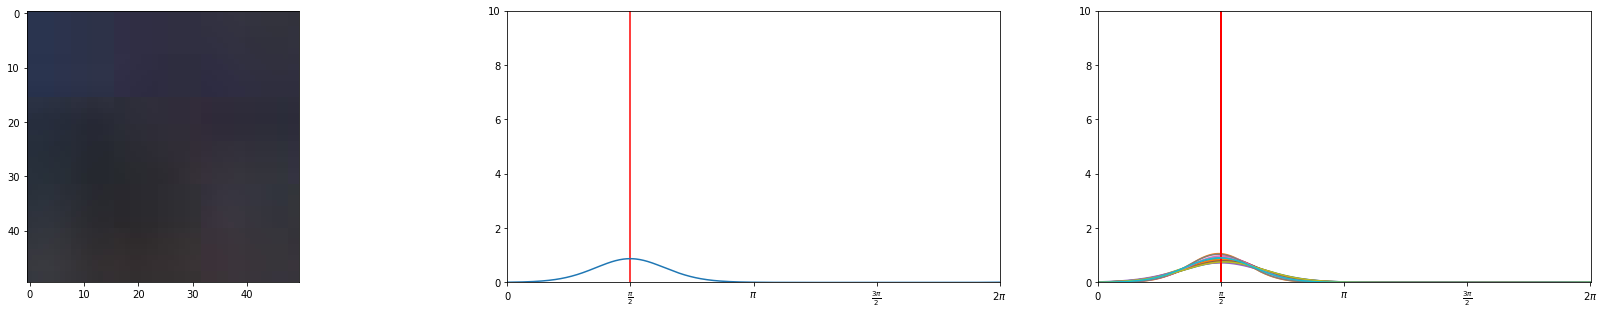

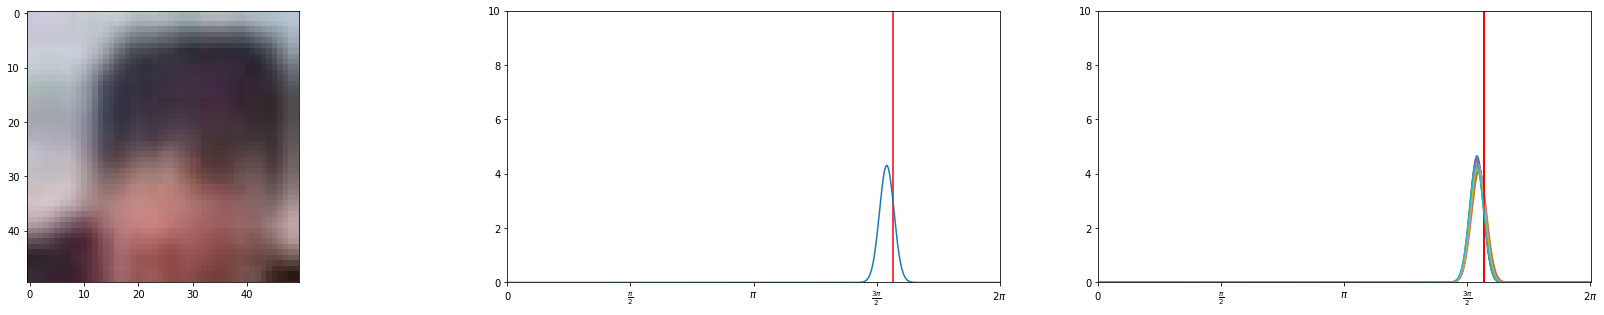

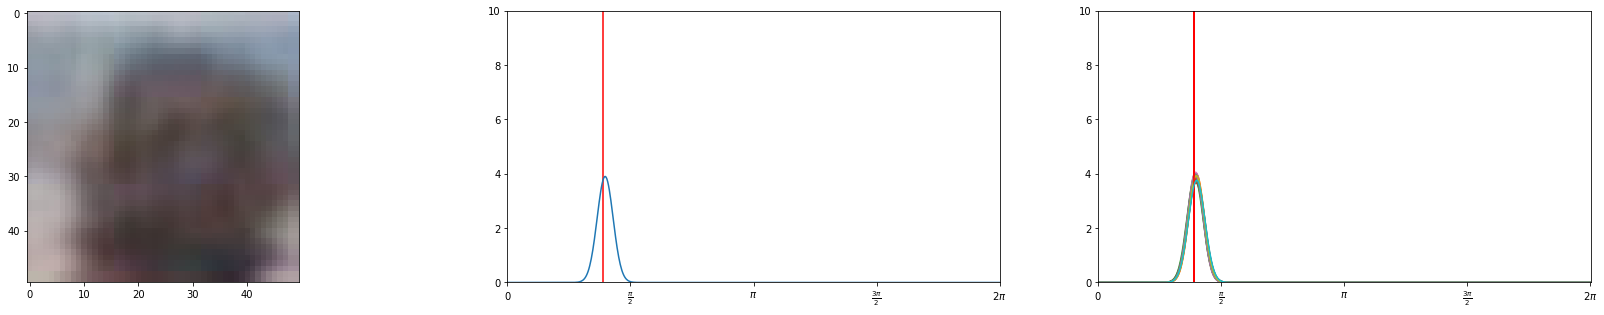

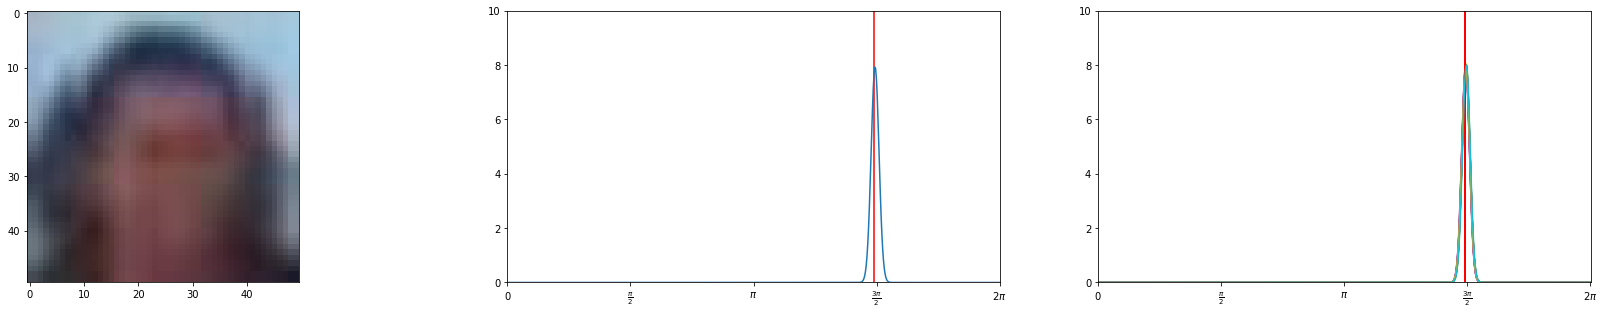

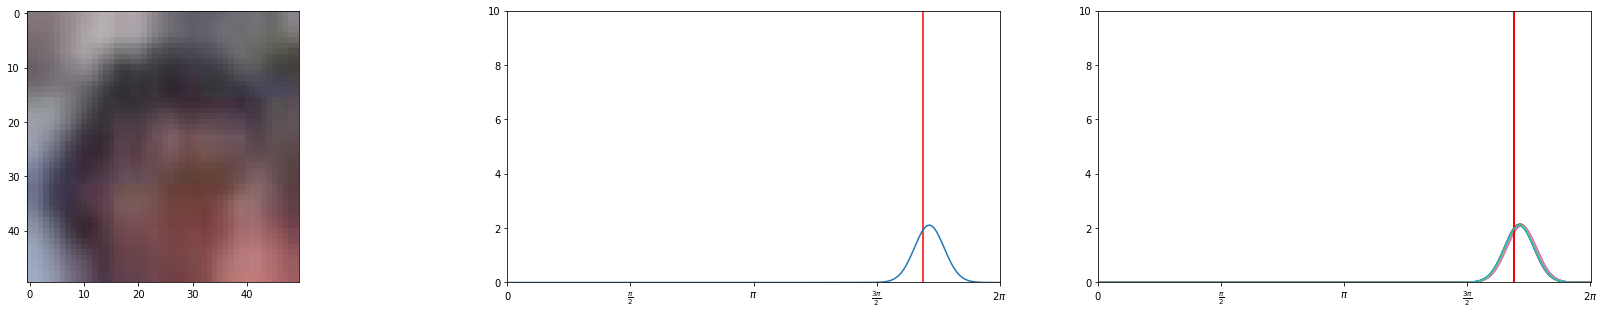

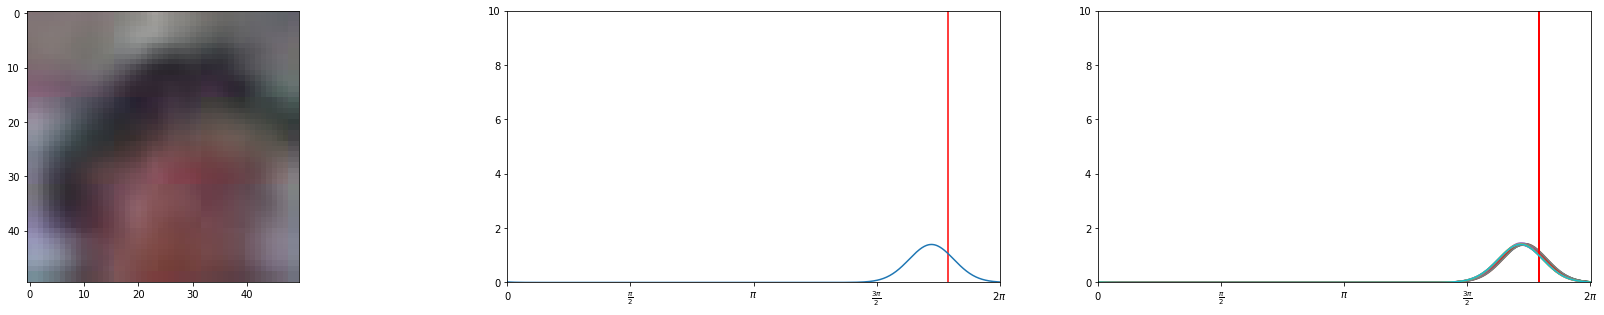

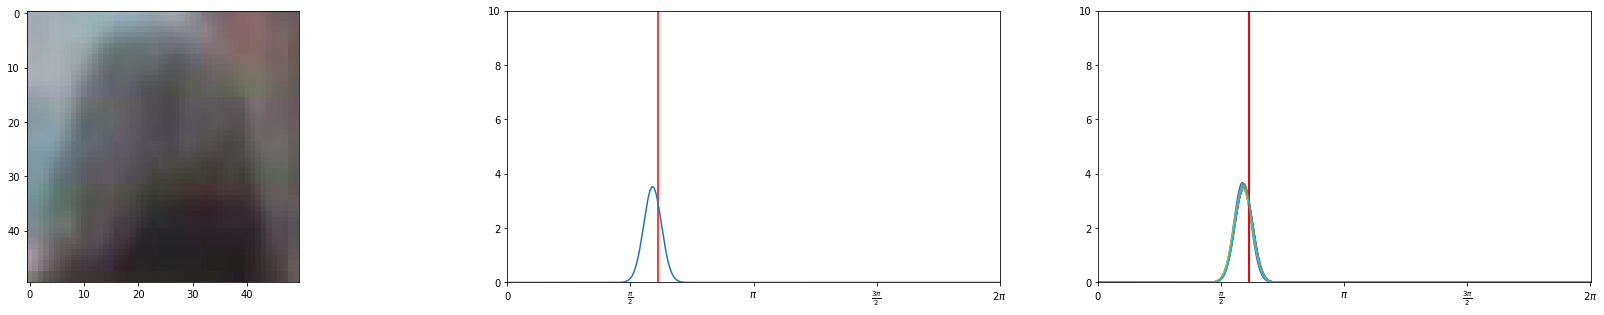

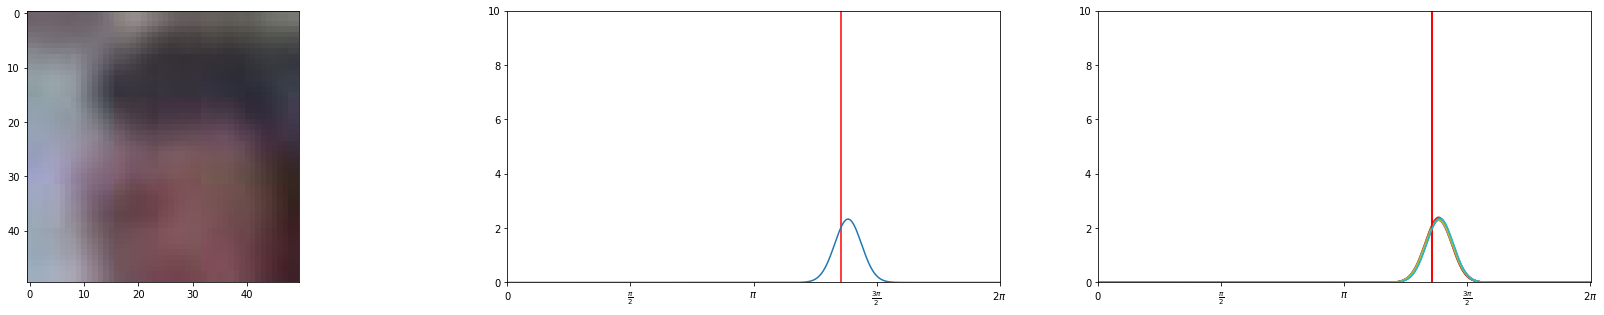

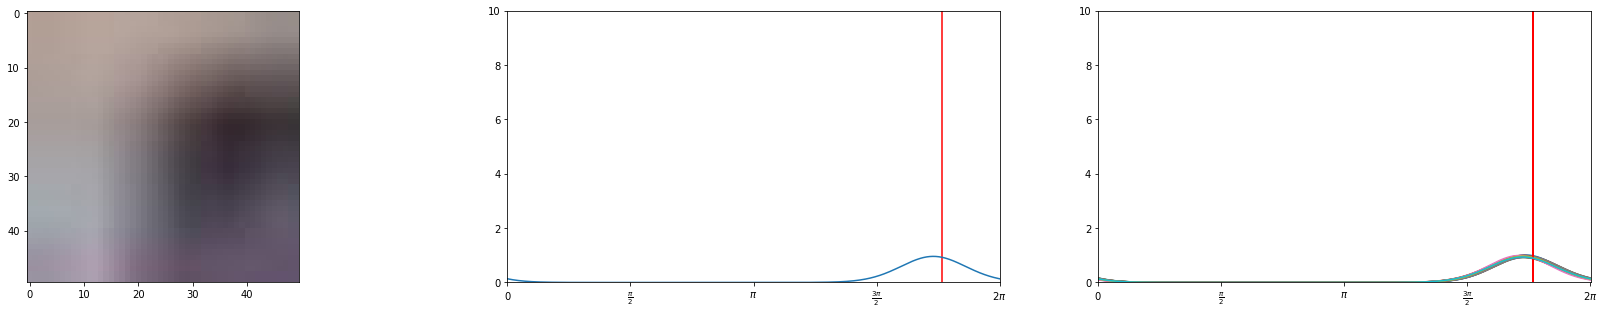

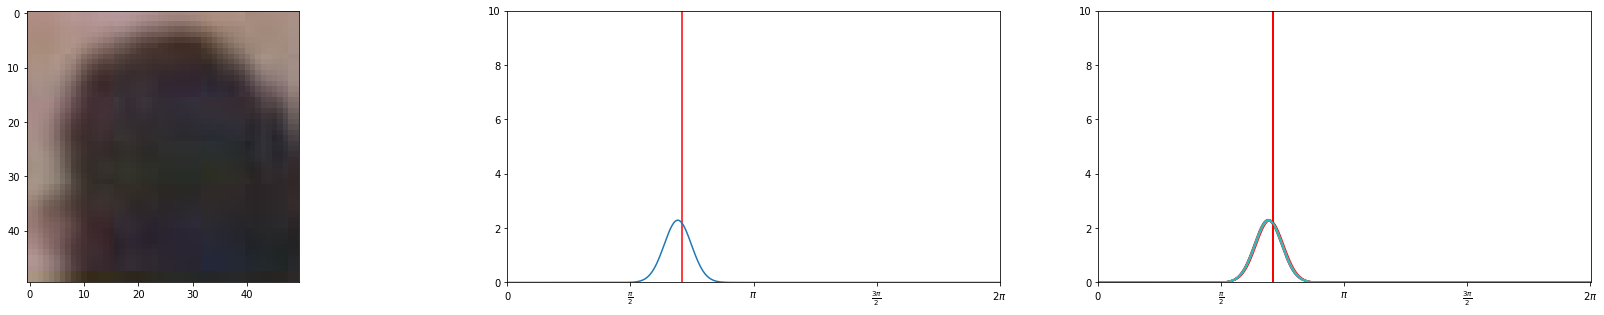

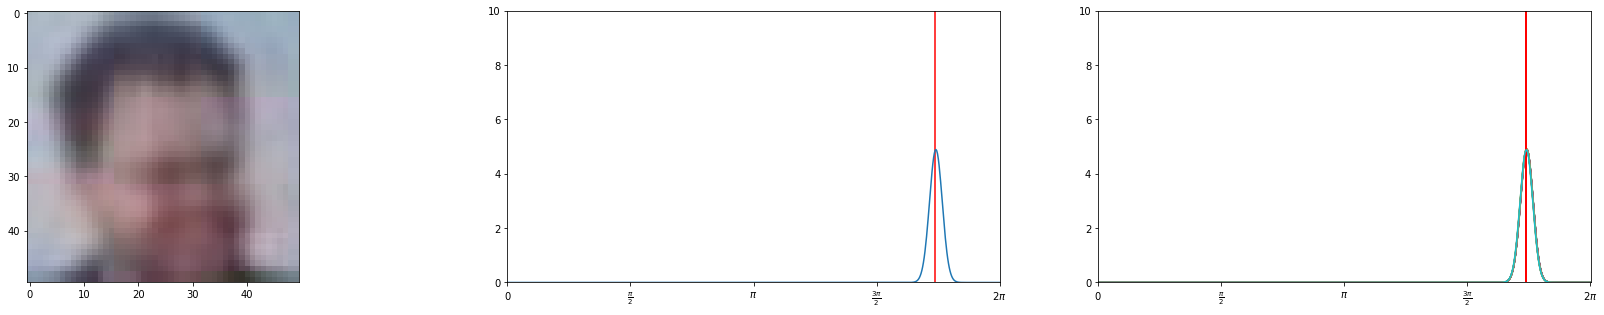

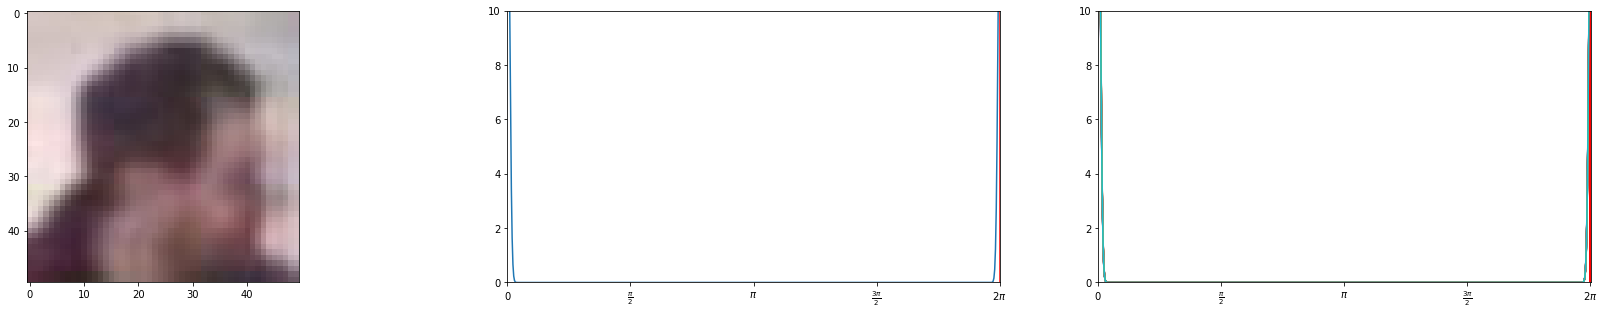

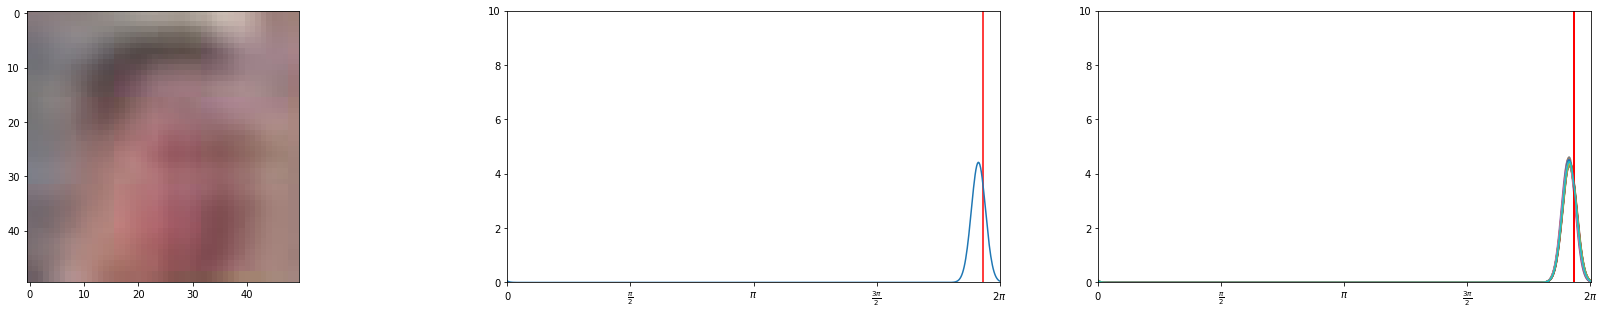

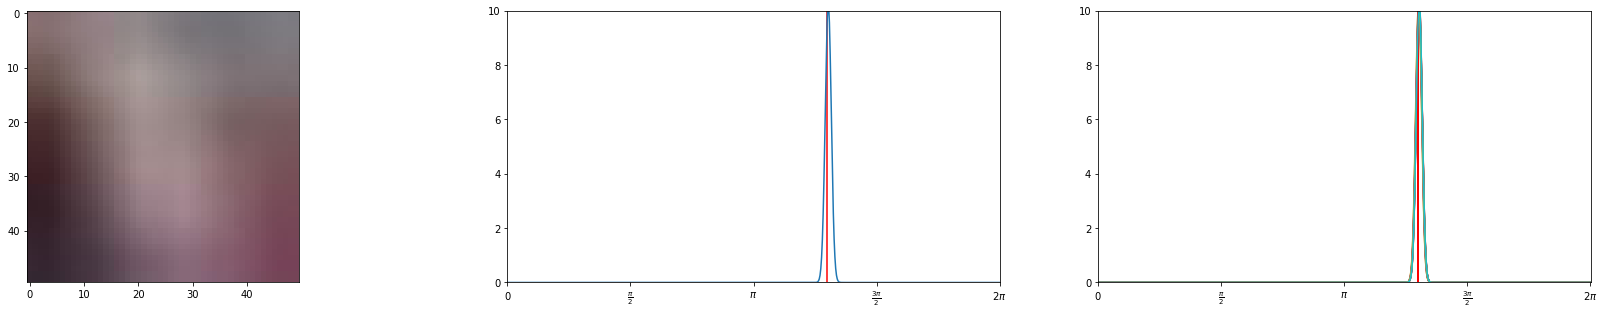

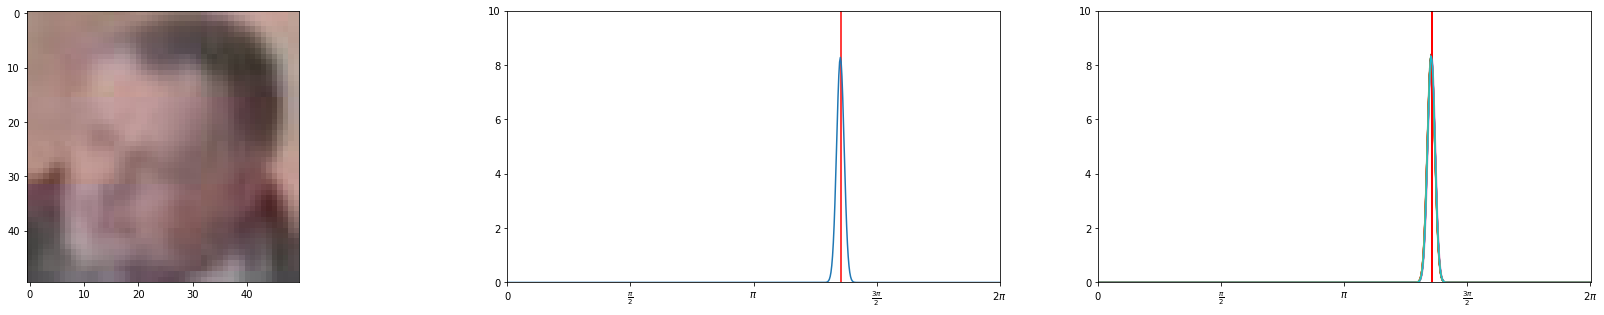

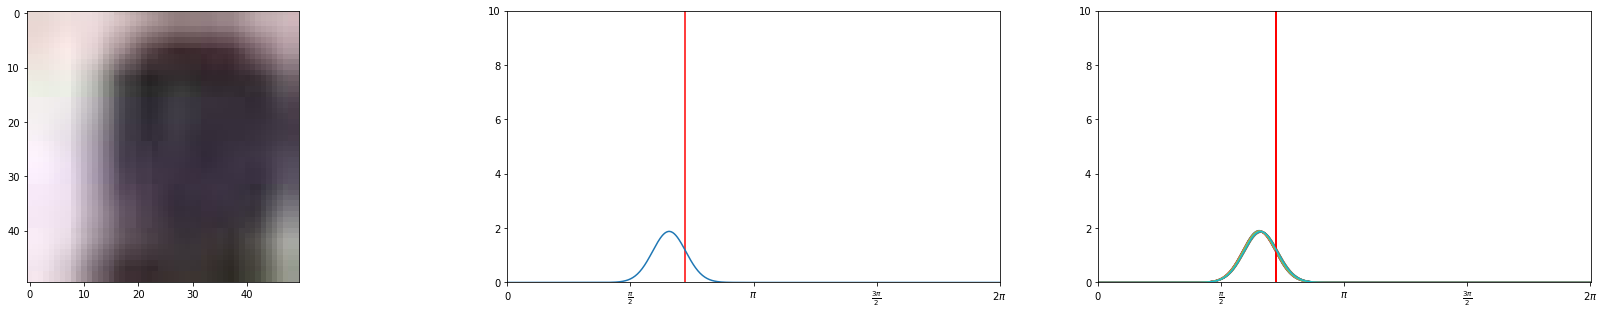

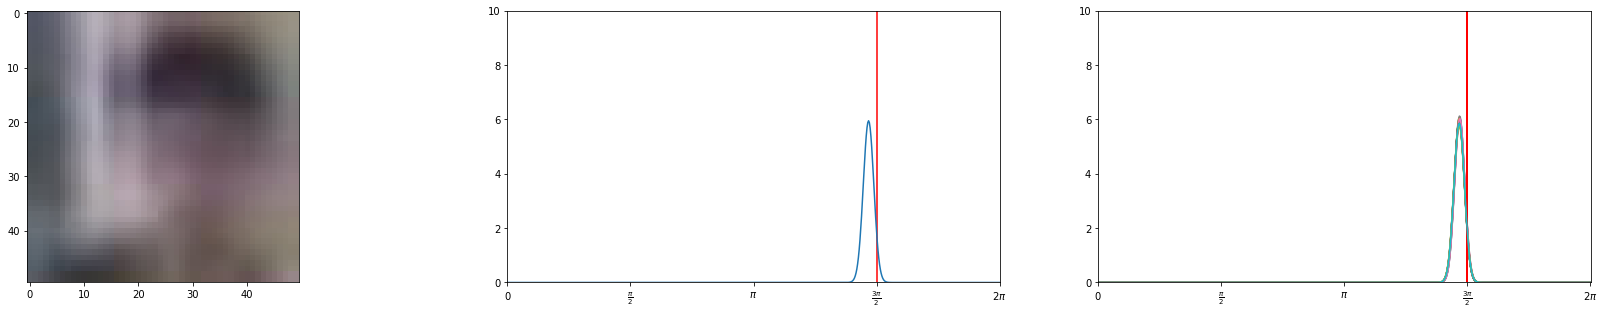

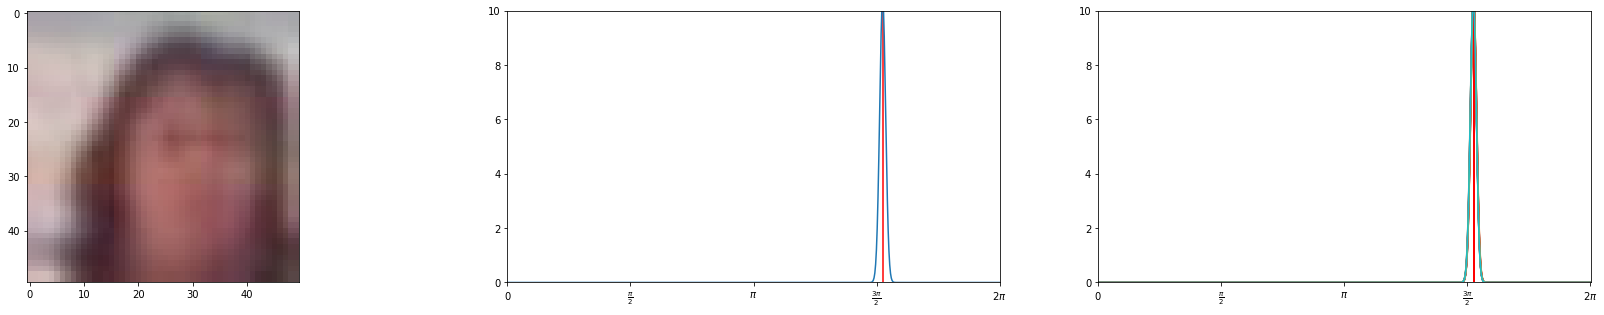

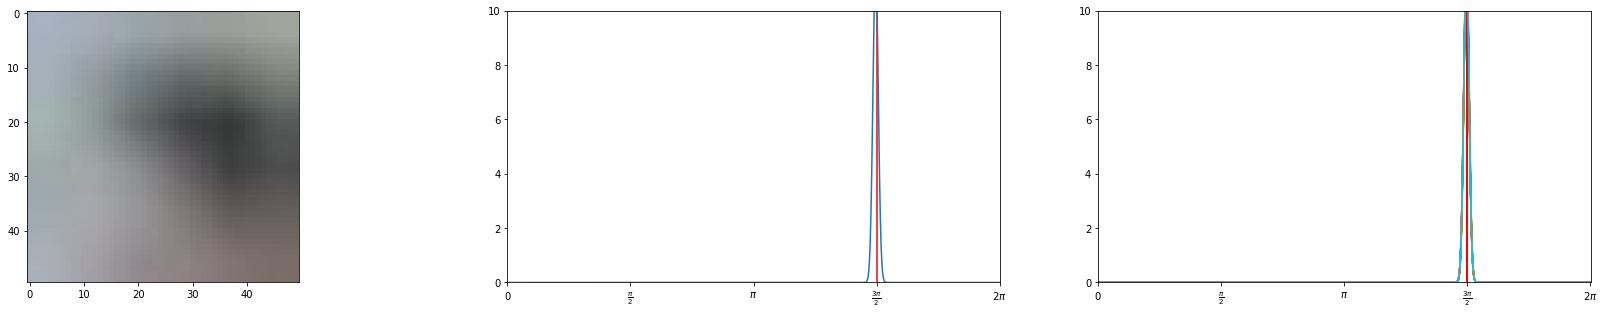

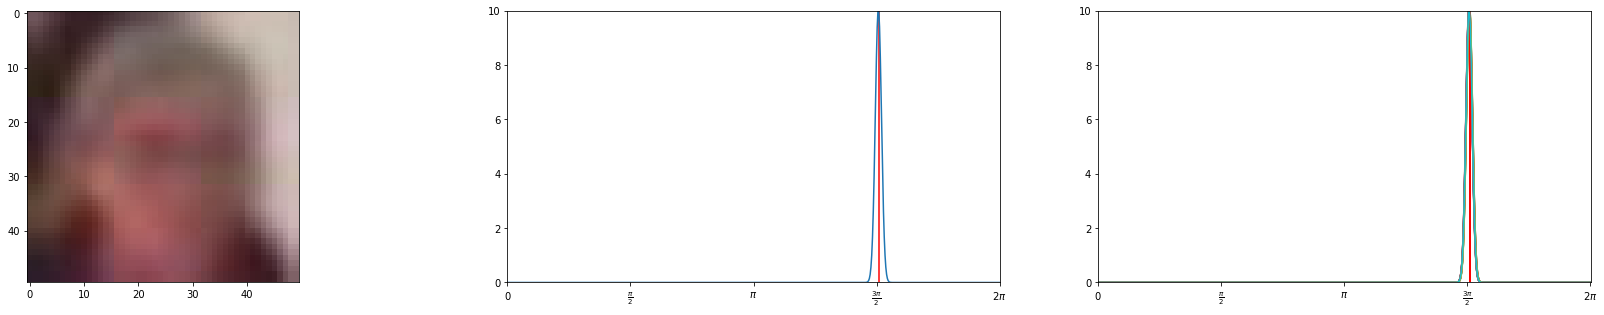

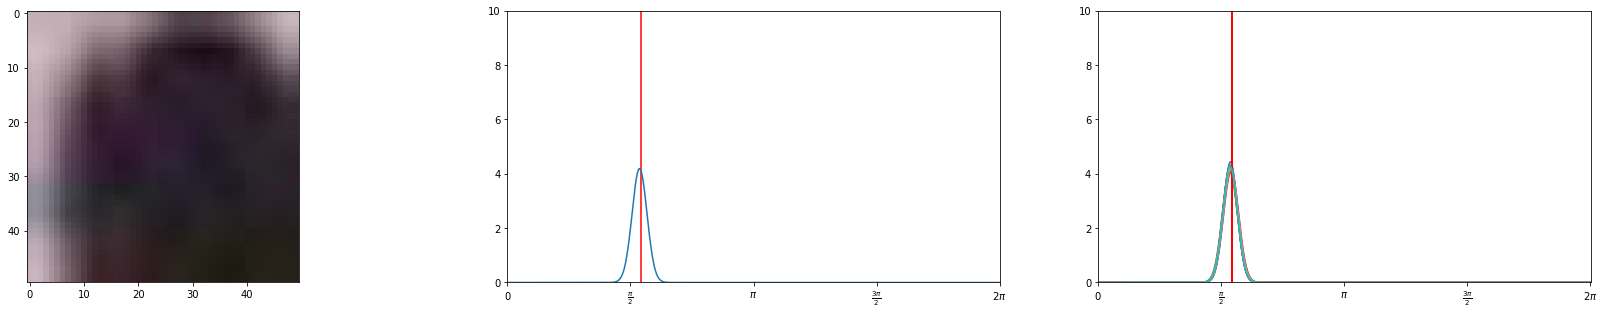

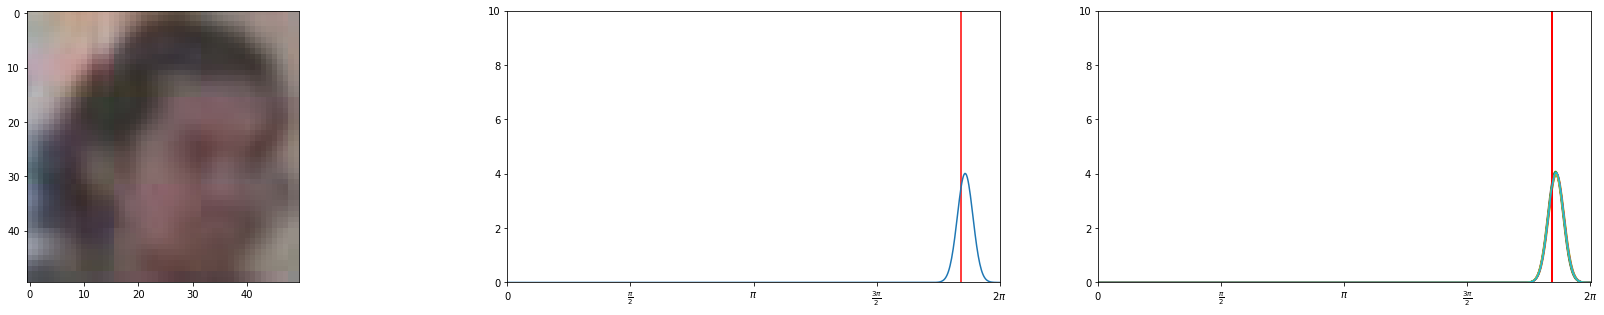

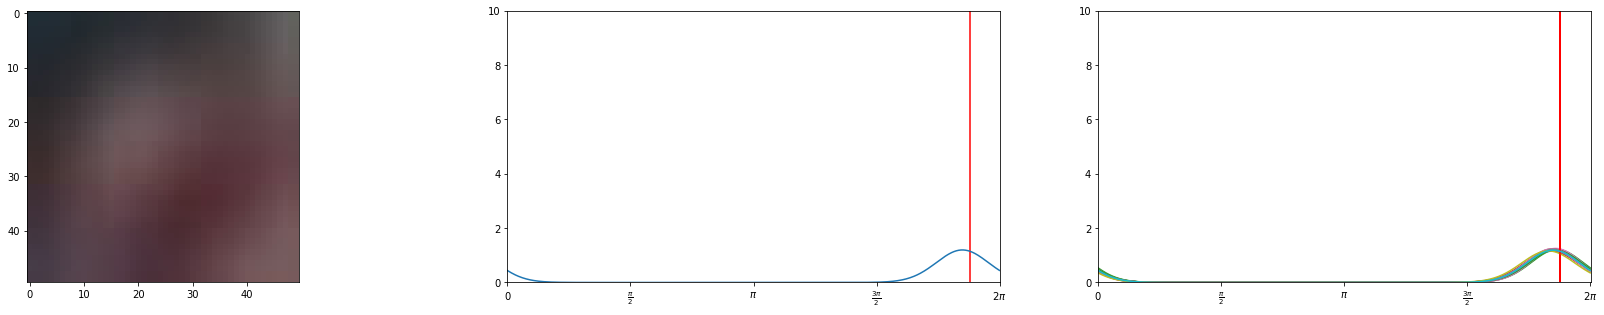

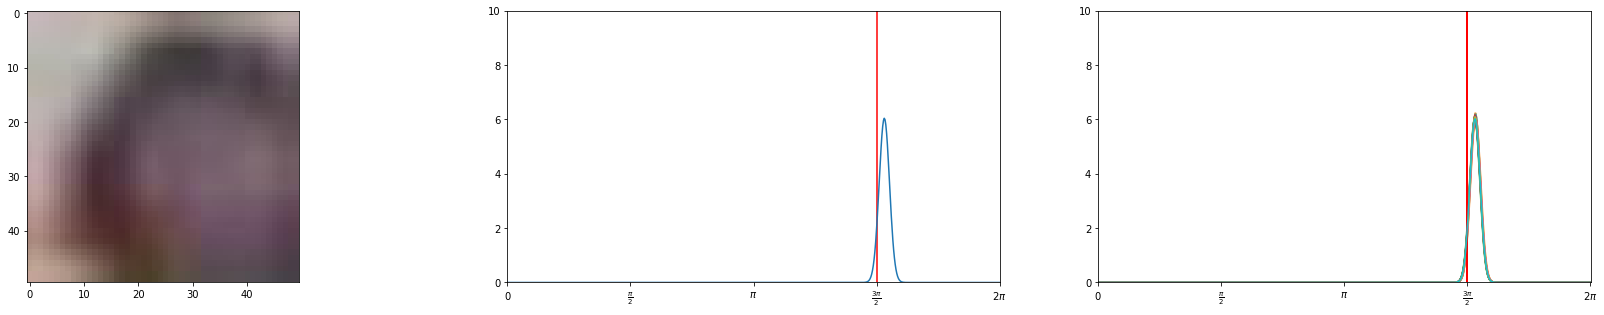

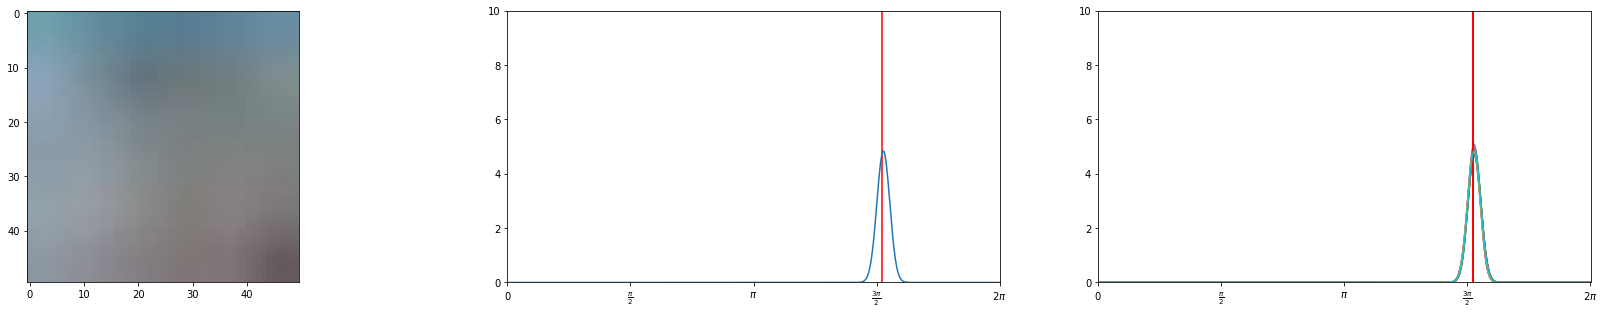

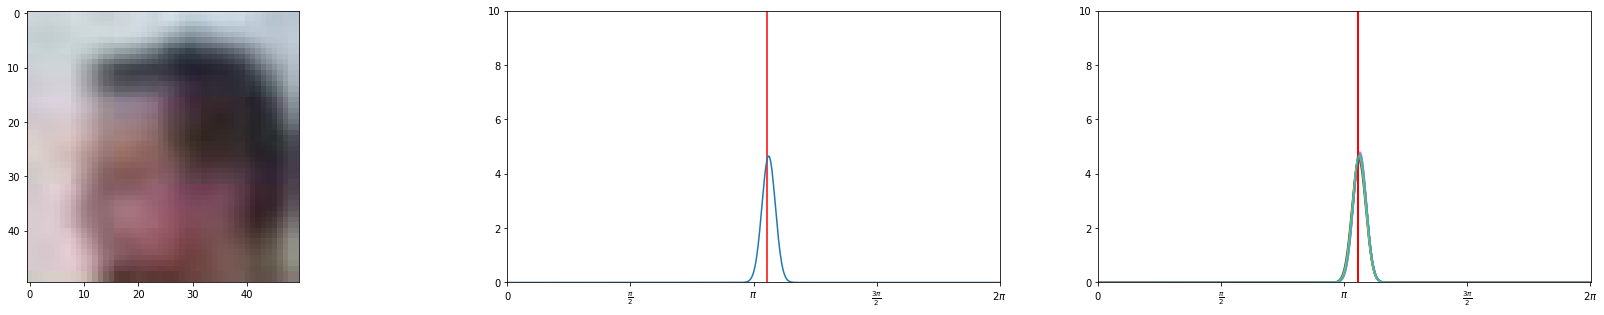

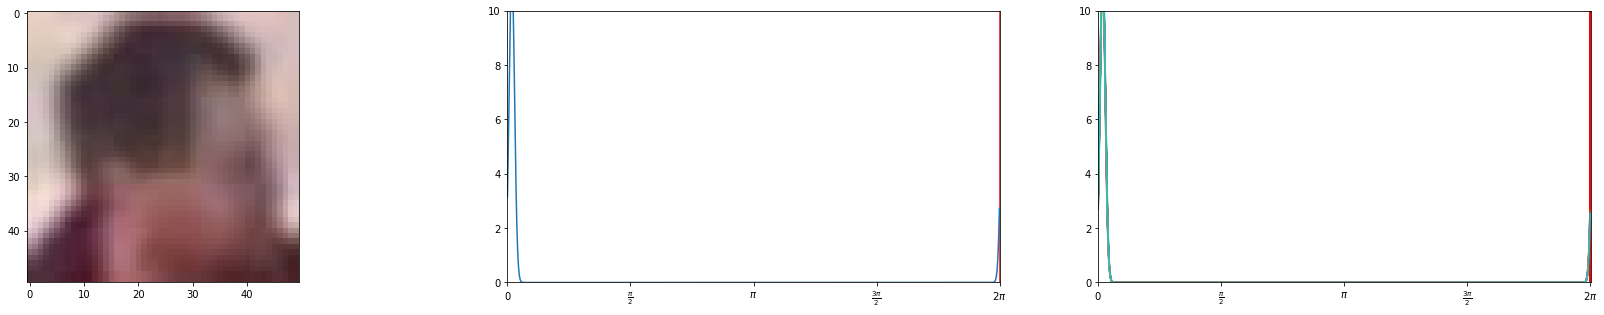

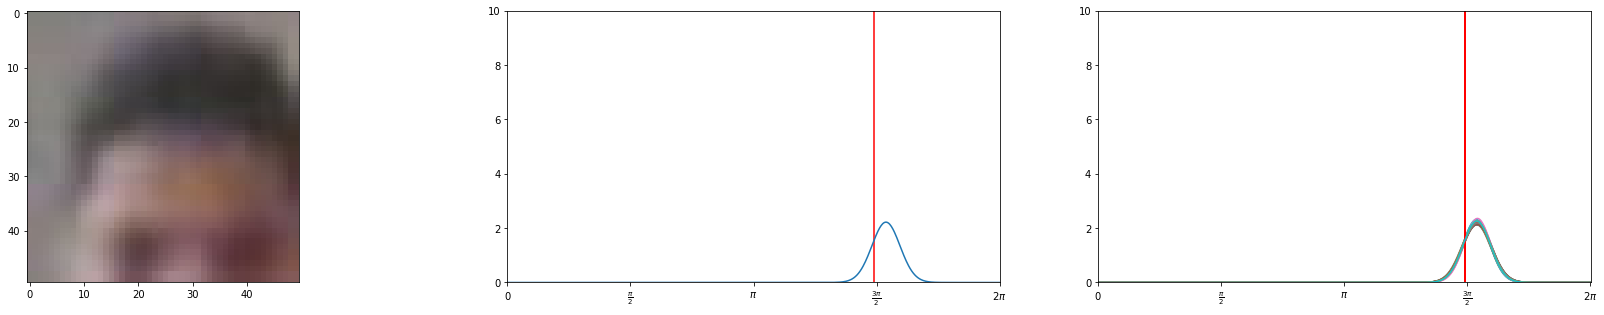

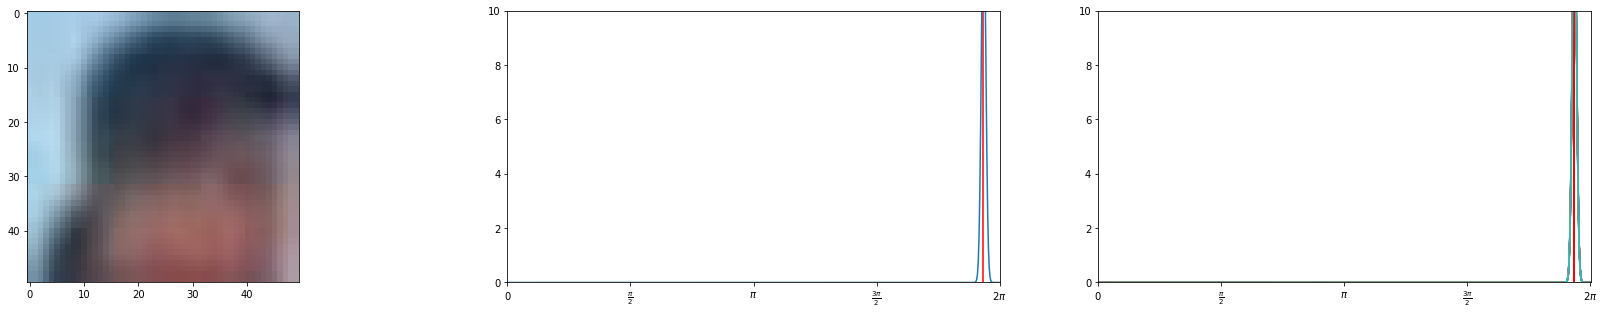

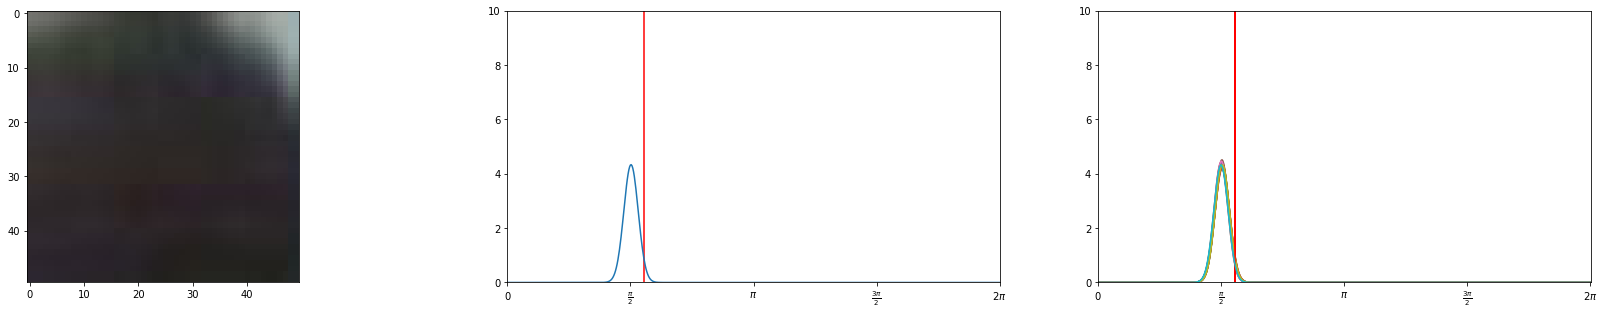

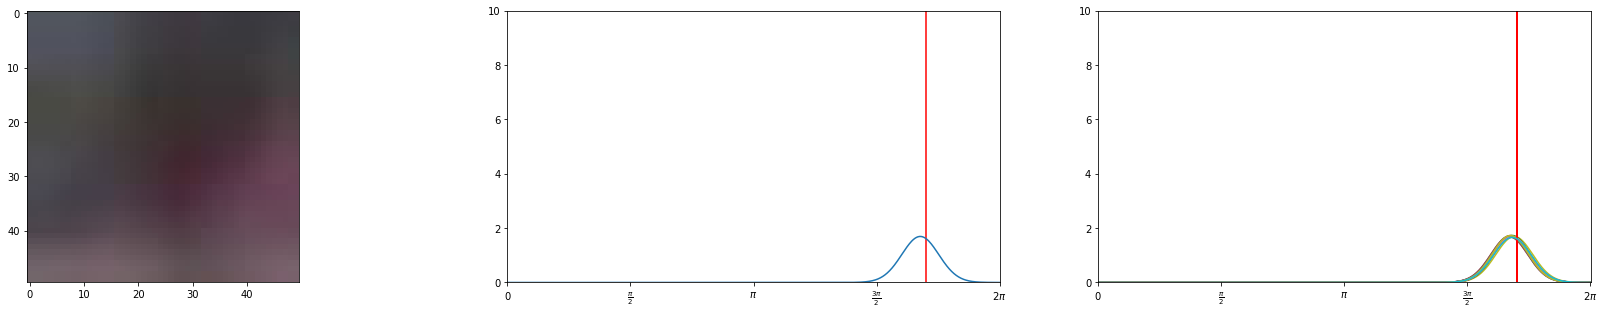

In [9]:
for fid in range(0, 100):
    plot_image_results(xte[fid], xvals, cvae_acc_pdfs[fid], cvae_samples_pdfs[fid], np.deg2rad(yte_deg[fid]))